# Question 1

In [334]:
# Feature extraction
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import time as t
from sklearn import metrics
import plot_mat
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.ticker as mticker
from sklearn.metrics.cluster import contingency_matrix 
from sklearn.decomposition import NMF

#initialize things that may be useful for console debugging
def printDashes(count):
    i = 0
    for i in range(count):
        consoleSeparator = '-' * 100
        print(consoleSeparator)

#define the labels that will dictate the classification process
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey'
            ]

dataset = fetch_20newsgroups(subset='all',categories=categories,shuffle=True, random_state=42, remove = ['headers', 'footers'])
# dataset = fetch_20newsgroups(subset='all',categories=categories,shuffle=True, random_state=42)

class_names = ['Computer Technology', 'Recreational Activity']
print(len(class_names))

#we now know that ints 0-3 belong to Comp and 4-7 belong to Rec
targets = np.unique(dataset.target)
targets_list = np.split(targets, 2)

class_labels = []

for i in dataset.target:
    if i in targets_list[0]:
        class_labels.append(0)
    else:
        class_labels.append(1)
                
'''
We now have a binary classification list for the train and test data with
0 = Computer Technology
1 = Recreational Activities
'''

full_labels = dataset.target
print(full_labels)
print(np.unique(full_labels))

true_k = np.unique(full_labels).shape[0]
true_labels = np.unique(class_labels)
true_label_names = class_names

# Count_vect = CountVectorizer(min_df=3,stop_words='english')
# count_matrix = Count_vect.fit_transform(dataset.data)

tfidf_vect = TfidfVectorizer(min_df=3,stop_words='english')
tfidf_dataset = tfidf_vect.fit_transform(dataset.data)
print(tfidf_dataset.shape)

printDashes(1)
print("TFIDF Doc-Term Matrix Shape:", tfidf_dataset.shape)

2
[2 1 2 ... 2 3 4]
[0 1 2 3 4 5 6 7]
(7882, 23522)
----------------------------------------------------------------------------------------------------
TFIDF Doc-Term Matrix Shape: (7882, 23522)


In [86]:
# # Clustering
from sklearn.cluster import KMeans, MiniBatchKMeans
km = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=30,random_state=0)
# trunc = TruncatedSVD(n_components=1000, random_state=0)
# tfidf_reduced = trunc.fit_transform(tfidf_train)
km = km.fit(tfidf_dataset)
display(contingency_matrix(class_labels,km.labels_))

# print("Clustering sparse data with %s" % km)
# t0 = t.time()
# km.fit(tfidf_train) #train using the tf-idf matrix
# print("done in %0.3fs" % (t.time() - t0))
# print()


array([[ 695, 3208],
       [3926,   53]])

In [13]:
import pandas as pd
def report_scores_kmeans(ground_truth_labels,cluster_lables,classifier_name):
    #use pandas df to print the accuracy, recall, precision, and f-1 score
    myData = {'Homogeneity' : pd.Series(metrics.homogeneity_score(ground_truth_labels,cluster_lables),
                        index =[classifier_name]),
                    'Completeness' : pd.Series(metrics.completeness_score(ground_truth_labels,cluster_lables),
                        index =[classifier_name]),
                    'V_measure' : pd.Series(metrics.v_measure_score(ground_truth_labels,cluster_lables),
                        index =[classifier_name]),
                    'Adjusted_Rand_Index' : pd.Series(metrics.adjusted_rand_score(ground_truth_labels,cluster_lables),
                       index =[classifier_name]),
                    'Adjusted_Mutual_Info_Score' : pd.Series(metrics.adjusted_mutual_info_score(ground_truth_labels,cluster_lables),
                       index =[classifier_name])}

    #create the datadrame
    myDf = pd.DataFrame(myData).copy()

    #print the data frame
    return(myDf)

# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
# print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
# print("Adjusted Rand-Index: %.3f"
#       % metrics.adjusted_rand_score(labels, km.labels_))


In [14]:
#function for plotting the contingency matrix for a cluster classifier
import matplotlib.ticker as mticker
from sklearn.metrics.cluster import contingency_matrix
import plot_mat # using the provided plotmat.py
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import plot_mat 

def plot_contingency(true_label_names,true_labels,predict_labels,plotName):
    label_format = '{:,.0f}'
        
    #get the contingency matrix for the k=2 clustering classifier
    contingencyMatrix = contingency_matrix(true_labels,predict_labels)
    rows, cols = linear_sum_assignment(contingencyMatrix, maximize=True)
    
    #produce the permuted contingency matrix
    contingencyMatrixPermuted = contingencyMatrix[rows[:, np.newaxis],cols]

#     display(contingencyMatrix)

    #plot contingency
    figure_contingency = plt.figure(figsize=(10,10))
    axes_contingency = figure_contingency.add_subplot(111)
    # using the matshow() function 
    caxes_cont = axes_contingency.matshow(contingencyMatrixPermuted, cmap=plt.cm.Blues)
#     cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
#     caxes_cont.set_ticks(np.arange(21))
#     caxes_cont.set_ticklabels(true_label_names)

    plotName = "Contingency Matrix\n" + plotName
    plt.title(plotName);
    figure_contingency.colorbar(caxes_cont)
    
    #add contingency matrix values to each element
    for i in range(len(true_label_names)):
        for j in range(len(true_label_names)):
            axes_contingency.text(i, j, str(contingencyMatrixPermuted[i][j]), va='center', ha='center')
    
    #plot confusion
#     figure_confusion = plt.figure(figsize=(10,10))
#     axes_confusion = figure_confusion.add_subplot(111)
#     # using the matshow() function 
#     caxes_conf = axes_confusion.matshow(contingencyMatrix)
#     figure_confusion.colorbar(caxes_conf)
#     cm = confusion_matrix(true_labels,predict_labels)
#     rows, cols = linear_sum_assignment(cm, maximize=True)
#     plot_mat.plot_sim_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows,pic_fname="test",size=(10,10))
    
    
#     y_ticks = []
#     for i in range(len(true_labels)+1):
#         if i == 0:
#             y_ticks.append("")
#         else:
#             y_ticks.append(true_labels[i-1])
#     print(y_ticks)
    
#     axes.set_xticklabels(['']+truth_labels)
#     axes.set_yticklabels(y_ticks)
    
#     ticks_loc = axes.get_yticks().tolist()
#     axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#     axes.set_yticklabels([true_label_names.all])

    plt.show()

# Question 2

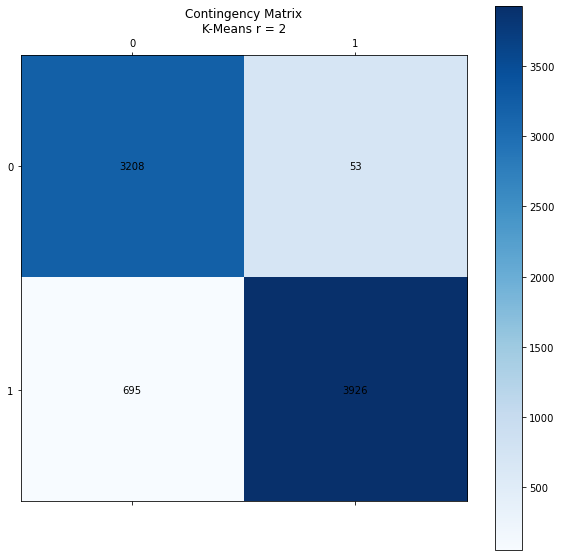

In [313]:
from sklearn.metrics.cluster import contingency_matrix 
# plt.matshow(fit_cluster_kmeans.transform)

# print(true_labels)
# print(true_label_names)

#call the contingency matrix plot function 
plot_contingency(class_names,class_labels,km.labels_,"K-Means r = 2")

# Question 3

In [90]:
#print the clustering scores
#call the report scores function for the k-means algorithm
report_scores_kmeans(class_labels, km.labels_,classifier_name="K-means K=2")

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means K=2,0.592269,0.605293,0.59871,0.656382,0.598673


# Question 4

In [91]:
from sklearn.decomposition import TruncatedSVD

# printDashes(1)
# print(reduced_tfidf_train.shape)
# print(TruncSVD_model.explained_variance_ratio_)
# print(len(TruncSVD_model.explained_variance_ratio_))

#create r array
r_array = [1,10,50,100,250,500,750,1000]
top_r_variance = []
for i in range(len(r_array)):
    TruncSVD_model = TruncatedSVD(n_components=r_array[i], random_state=0)
    reduced_tfidf = TruncSVD_model.fit_transform(tfidf_dataset)
    printDashes(1)
    print(reduced_tfidf.shape)
    top_r_variance.append(TruncSVD_model.explained_variance_ratio_.sum())
    print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
    

----------------------------------------------------------------------------------------------------
(7882, 1)
i= 1 0.0020143657465157066
----------------------------------------------------------------------------------------------------
(7882, 10)
i= 10 0.031678250708005756
----------------------------------------------------------------------------------------------------
(7882, 50)
i= 50 0.09018338870614567
----------------------------------------------------------------------------------------------------
(7882, 100)
i= 100 0.14106373121632032
----------------------------------------------------------------------------------------------------
(7882, 250)
i= 250 0.25237057357165865
----------------------------------------------------------------------------------------------------
(7882, 500)
i= 500 0.3814721129274299
----------------------------------------------------------------------------------------------------
(7882, 750)
i= 750 0.47704034874567175
--------------------------

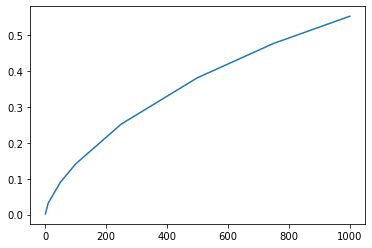

In [92]:
#plot the variances vs. the n_components
plt.plot(r_array,top_r_variance)
plt.show()

In [93]:
#function for sweeping n_components
#create r array
def sweep_n_comp_SVD(tfidf_train,true_labels,r):
        TruncSVD_model = TruncatedSVD(n_components=r, random_state=0)
        reduced_tfidf_train = TruncSVD_model.fit_transform(tfidf_train)
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
        top_r_variance = TruncSVD_model.explained_variance_ratio_.sum()
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=30)
        kmObj = km.fit(reduced_tfidf_train) #train using the tf-idf matrix
        
        table_name = "SVD r=" + str(r)
        currDf = report_scores_kmeans(true_labels, km.labels_,classifier_name=table_name)
        
        return currDf, top_r_variance, kmObj
        
def sweep_n_comp_NMF(tfidf_train,true_labels,r):
        NMF_model = NMF(n_components=r, init='random', random_state=0)
        reduced_tfidf_train = NMF_model.fit_transform(tfidf_train)
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
#         top_r_variance = 100*(NMF_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=30)
        kmObj = km.fit(reduced_tfidf_train) #train using the tf-idf matrix
                
        table_name = "NMF r=" + str(r)
        currDf = report_scores_kmeans(true_labels, km.labels_,classifier_name=table_name)
        
        return currDf, top_r_variance, kmObj

In [94]:
#use a grid search to sweep over the n_components for both TruncatedSVD and a PCA models.
#choose the n_components values for SVD and PCA, that yield the best clustering purity metrics. 

from sklearn.decomposition import TruncatedSVD

r_array = [1,10,50,100,250,500,750,1000]
# r_array = [1]
top_var_SVD =[]
df_SVD = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array)):
    SVD_df, top_r_variance, kmObj = sweep_n_comp_SVD(tfidf_dataset,class_labels,r_array[i])
#     display(SVD_df)
    
    df_SVD = df_SVD.append(SVD_df)
    
    top_var_SVD.append(top_r_variance)
    
display(df_SVD)

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=1,0.019172,0.019518,0.019343,0.026167,0.019253
SVD r=10,0.546598,0.563823,0.555077,0.602041,0.555036
SVD r=50,0.567255,0.582318,0.574688,0.627510,0.574648
SVD r=100,0.570655,0.585641,0.578051,0.630731,0.578012
SVD r=250,0.571431,0.586606,0.578919,0.630731,0.578880
SVD r=500,0.570112,0.585420,0.577665,0.629119,0.577626
SVD r=750,0.593132,0.604906,0.598961,0.661738,0.598924
SVD r=1000,0.590711,0.602927,0.596756,0.658027,0.596719


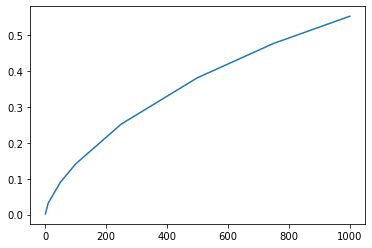

In [95]:
#plot the variances vs. the n_components
plt.plot(r_array,top_var_SVD)
plt.show()

# Question 5

In [96]:
from sklearn.decomposition import TruncatedSVD

r_array_SVD = [1,2,3,5,10,20,50,100,300]
# r_array = [1]
top_var_SVD =[]
df_SVD = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_SVD)):
    SVD_df, top_r_variance, kmObj = sweep_n_comp_SVD(tfidf_dataset,class_labels,r_array_SVD[i])
#     display(SVD_df)
    
    df_SVD = df_SVD.append(SVD_df)
    
    top_var_SVD.append(top_r_variance)
    
display(df_SVD)

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=1,0.018912,0.019233,0.019071,0.025839,0.018981
SVD r=2,0.529987,0.547472,0.538588,0.586391,0.538545
SVD r=3,0.539343,0.555690,0.547394,0.598502,0.547352
SVD r=5,0.511308,0.535356,0.523056,0.548919,0.523011
SVD r=10,0.551947,0.568457,0.560080,0.609151,0.560040
SVD r=20,0.557492,0.574256,0.565750,0.613119,0.565709
SVD r=50,0.567255,0.582318,0.574688,0.627510,0.574648
SVD r=100,0.571317,0.586236,0.578680,0.631537,0.578641
SVD r=300,0.576302,0.590727,0.583425,0.637602,0.583387


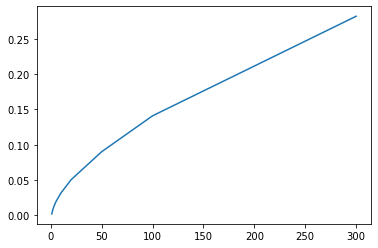

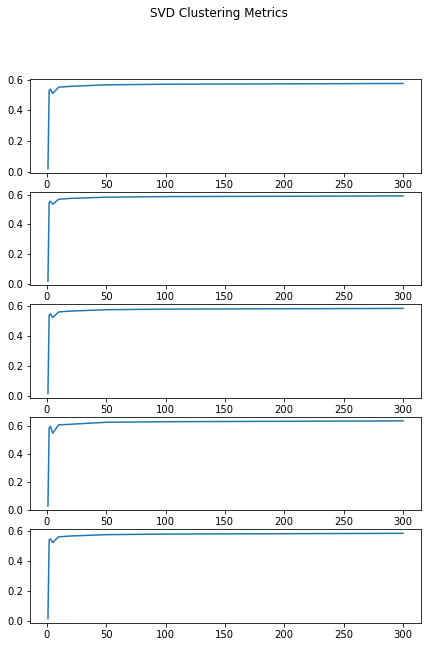

In [97]:
#SVD plots
#plot the variances vs. the n_components
#SVD
plt.plot(r_array_SVD,top_var_SVD)
plt.show()

fig1 = plt.figure(figsize=(7,10))
axs = fig1.subplots(5)
fig1.suptitle('SVD Clustering Metrics')
axs[0].plot(r_array_SVD, df_SVD.Homogeneity)
axs[1].plot(r_array_SVD, df_SVD.Completeness)
axs[2].plot(r_array_SVD, df_SVD.V_measure)
axs[3].plot(r_array_SVD, df_SVD.Adjusted_Rand_Index)
axs[4].plot(r_array_SVD, df_SVD.Adjusted_Mutual_Info_Score)

In [98]:
from sklearn.decomposition import NMF

r_array_NMF = [1,2,3,5,10,20,50,100]
# r_array = [1,10,50]
top_var_NMF =[]
df_NMF = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_NMF)):
    NMF_df, top_r_variance, kmObj = sweep_n_comp_NMF(tfidf_dataset,class_labels,r_array_NMF[i])
#     display(SVD_df)
    
    df_NMF = df_NMF.append(NMF_df)
    
    top_var_NMF.append(top_r_variance) 

display(df_NMF)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
NMF r=1,0.018967,0.019285,0.019125,0.025921,0.019034
NMF r=2,0.502399,0.526336,0.514089,0.541424,0.514043
NMF r=3,0.470203,0.500375,0.484820,0.494316,0.484772
NMF r=5,0.485833,0.513948,0.499495,0.514139,0.499448
NMF r=10,0.210735,0.306834,0.249863,0.139601,0.249782
NMF r=20,0.060232,0.188279,0.091267,0.015614,0.091140
NMF r=50,0.002130,0.095910,0.004168,-0.000065,0.003984
NMF r=100,0.007372,0.119236,0.013885,0.000487,0.013714


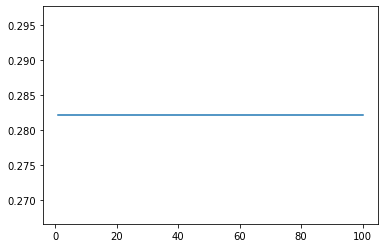

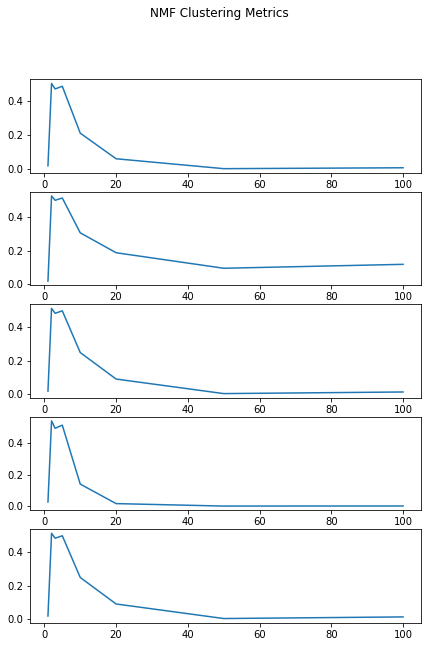

In [99]:
#plot the variances vs. the n_components
#NMF
#SVD plots
#plot the variances vs. the n_components
#SVD
plt.plot(r_array_NMF,top_var_NMF)
plt.show()

fig2 = plt.figure(figsize=(7,10))
axs2 = fig2.subplots(5)
fig2.suptitle('NMF Clustering Metrics')
axs2[0].plot(r_array_NMF, df_NMF.Homogeneity)
axs2[1].plot(r_array_NMF, df_NMF.Completeness)
axs2[2].plot(r_array_NMF, df_NMF.V_measure)
axs2[3].plot(r_array_NMF, df_NMF.Adjusted_Rand_Index)
axs2[4].plot(r_array_NMF, df_NMF.Adjusted_Mutual_Info_Score)

# Question 6

How do you explain the non-monotonic behavior of the measures as r increases?

# Question 7

Visualize the clustering result for the optimal r's for SVD and NMF. Plot the clusters in a 2D plane.

In [129]:
#store the full class label set
full_labels = dataset.target

r_array_SVD_opt = [2]
df_SVD = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_SVD_opt)):
    SVD_df, top_r_variance, km_SVD_obj = sweep_n_comp_SVD(tfidf_dataset,class_labels,r_array_SVD_opt[i])
    
    df_SVD = df_SVD.append(SVD_df)
    
    top_var_SVD.append(top_r_variance)
    
display(df_SVD)

#run NMF DR and kmeans for optimal r
r_array_NMF_opt = [2]
top_var_NMF =[]
df_NMF = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_NMF_opt)):
    NMF_df, top_r_variance, km_NMF_obj = sweep_n_comp_NMF(tfidf_dataset,class_labels,r_array_NMF_opt[i])
#     display(SVD_df)
    
    df_NMF = df_NMF.append(NMF_df)
    
    top_var_NMF.append(top_r_variance)  

display(df_NMF)

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=2,0.52751,0.545266,0.536241,0.583286,0.536198


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
NMF r=2,0.501669,0.525881,0.51349,0.539931,0.513444


In [101]:
def plot_cluster(kmObj,tfidf_reduced,label,plotName):
    #Getting unique labels
    all_labels = np.unique(label)
#     print(all_labels)
         
    #Getting the Centroids
    centroids = kmObj.cluster_centers_
    u_labels = np.unique(label)
    
    plt.figure(figsize=(20,10))
    
    #plotting the results:
    for i in all_labels:
        plt.scatter(tfidf_reduced[label == i , 0] , tfidf_reduced[label == i , 1] , label = i)
        
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
    plt.title(plotName)
    plt.legend()
    plt.show()
 

In [263]:
def plot_cluster_nicely(kmObj,class_names,tfidf_reduced,true_labels,plotName):
    print(tfidf_reduced.shape)
        
    fig, ax = plt.subplots(1, figsize=(20, 10))
    plt.scatter(*tfidf_reduced.T,s=0.5,c=true_labels,cmap='Spectral',alpha=1.0)
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
    cbar.set_ticks(np.arange(21))
    cbar.set_ticklabels(class_names)
    plt.title(plotName);
    plt.legend()
    plt.show()

In [260]:
def plot_cluster_map(kmObj,class_names,tfidf_reduced,true_labels,plotName):       
    #Getting the Centroids
#     centroids = kmObj.cluster_centers_
#     u_labels = np.unique(label)
    
    plt.figure(figsize=(20,10))
    
    #plotting the results:
    for i in true_labels:
        plt.scatter(tfidf_reduced[true_labels == i , 0] , tfidf_reduced[true_labels == i , 1] , true_labels = i,s=0.5,alpha=1.0,cmap='spectral')
        
    plt.setp(ax, xticks=[], yticks=[])
    cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
    cbar.set_ticks(np.arange(21))
    cbar.set_ticklabels(class_names)
    plt.title(plotName);
    plt.legend()
    plt.show()
 

(7882, 2)


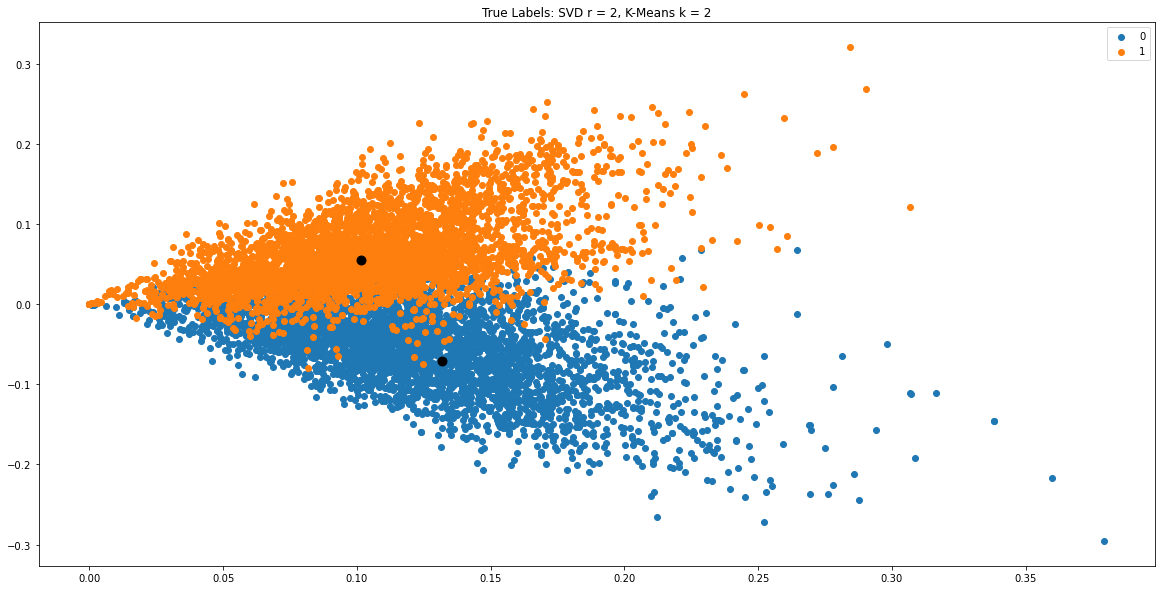

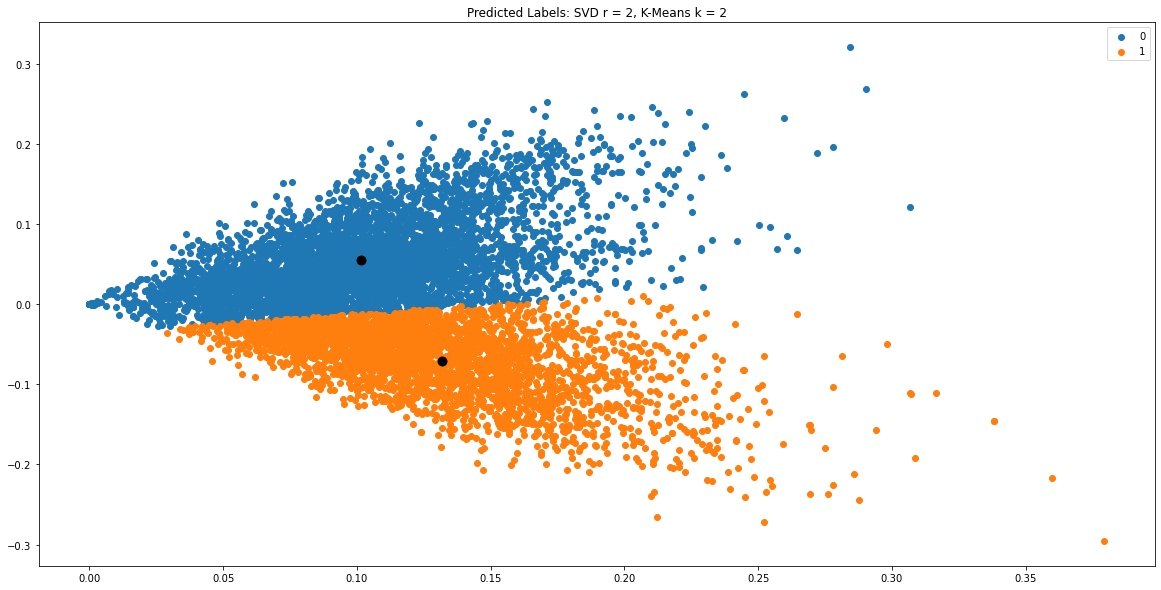

In [128]:
def SVD_kmeans_plot(tfidf_train,true_labels,r):
        TruncSVD_model = TruncatedSVD(n_components=r, random_state=0)
        reduced_tfidf = TruncSVD_model.fit_transform(tfidf_train)
        print(reduced_tfidf.shape)
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
        top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=30)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
#         print(labels)
        
        table_name = "SVD r=" + str(r)
        currDf = report_scores_kmeans(true_labels, km.labels_,classifier_name=table_name)
    
        #plot the cluster
        plot_cluster(km,reduced_tfidf,true_labels,"True Labels: SVD r = 2, K-Means k = 2")
        plot_cluster(km,reduced_tfidf,km_predicted_labels,"Predicted Labels: SVD r = 2, K-Means k = 2")
        
#         return currDf, top_r_variance, kmObj  
    
# SVD_kmeans_plot(tfidf_dataset,full_labels,2)   
SVD_kmeans_plot(tfidf_dataset,class_labels,2)   

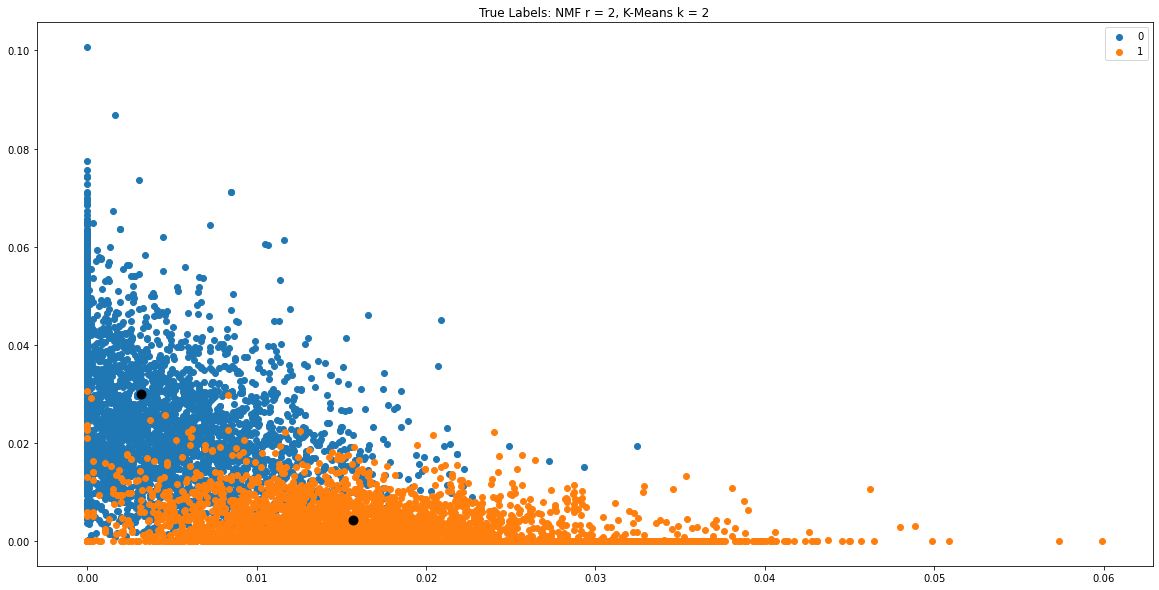

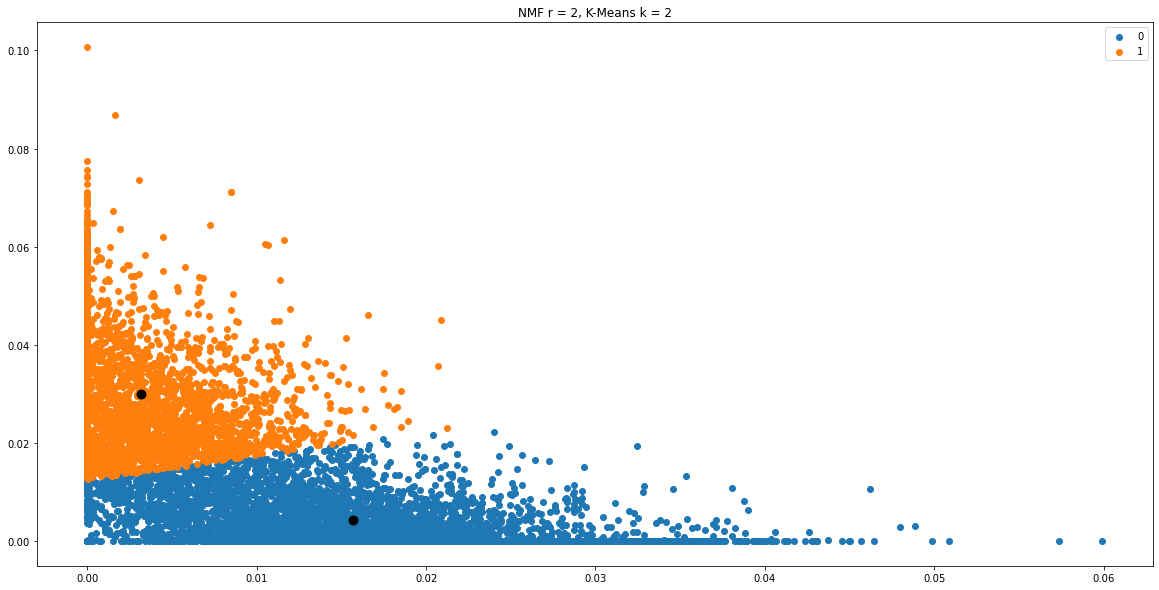

In [130]:
def NMF_kmeans_plot(tfidf_train,true_labels,r):
        NMF_model = NMF(n_components=r, init='random', random_state=0)
        reduced_tfidf = NMF_model.fit_transform(tfidf_train)
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
#         top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=30)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
#         print(labels)
        
        table_name = "NMF r=" + str(r)
        currDf = report_scores_kmeans(true_labels, km.labels_,classifier_name=table_name)
    
        #plot the cluster
        plot_cluster(km,reduced_tfidf,true_labels,"True Labels: NMF r = 2, K-Means k = 2")
        plot_cluster(km,reduced_tfidf,km_predicted_labels,"NMF r = 2, K-Means k = 2")
        
#         return currDf, top_r_variance, kmObj   
    
NMF_kmeans_plot(tfidf_dataset,class_labels,2)   

# Question 8

What do you observe in the visualization? How are the data points of the classes distributed? Is the data distribution ideal for K-means clustering (isotropic).

# Question 9

20
(18846, 45365)
(18846, 1)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=1",0.024446,0.026639,0.025496,0.005427,0.022179


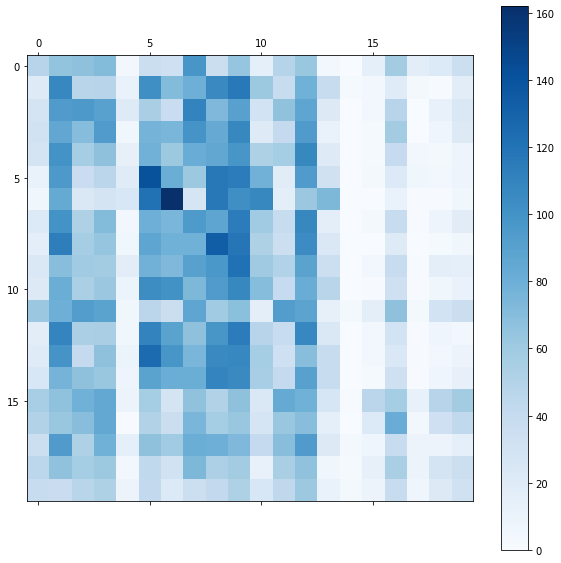

(18846, 2)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=2",0.212922,0.225255,0.218915,0.065592,0.216317


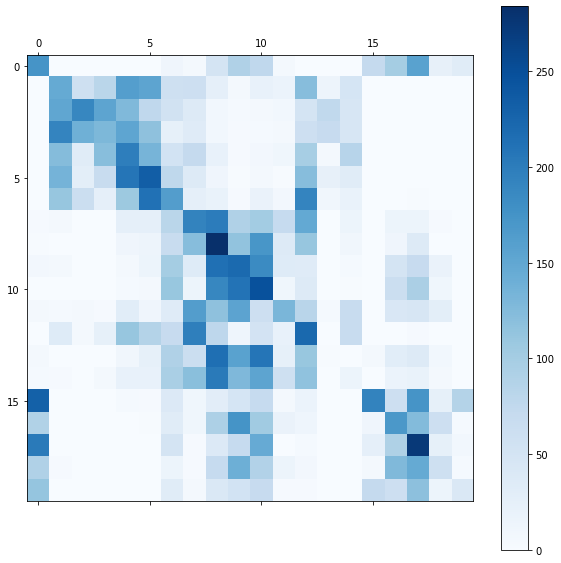

(18846, 3)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=3",0.247164,0.265546,0.256025,0.084386,0.253523


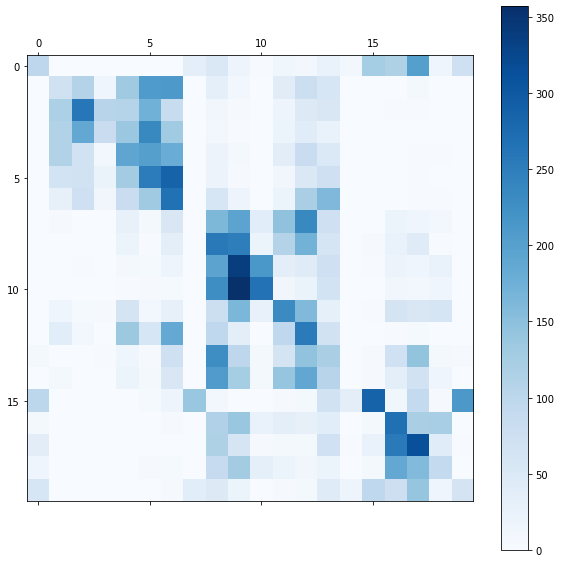

(18846, 5)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=5",0.322384,0.349981,0.335616,0.127225,0.333376


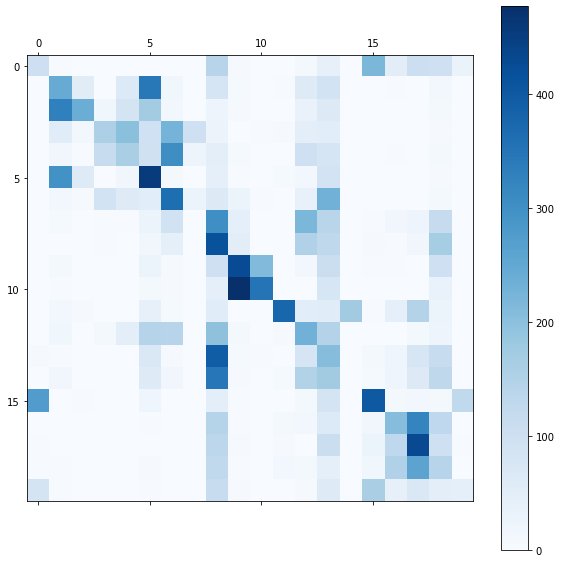

(18846, 10)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=10",0.326948,0.358146,0.341837,0.122807,0.339609


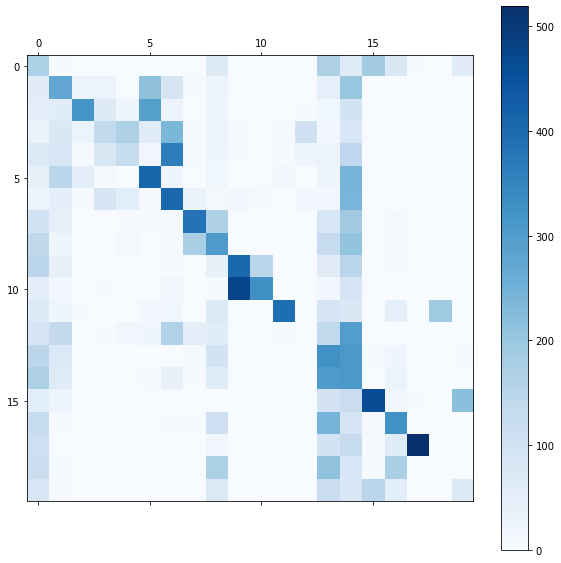

(18846, 20)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=20",0.326029,0.371576,0.347315,0.109624,0.345062


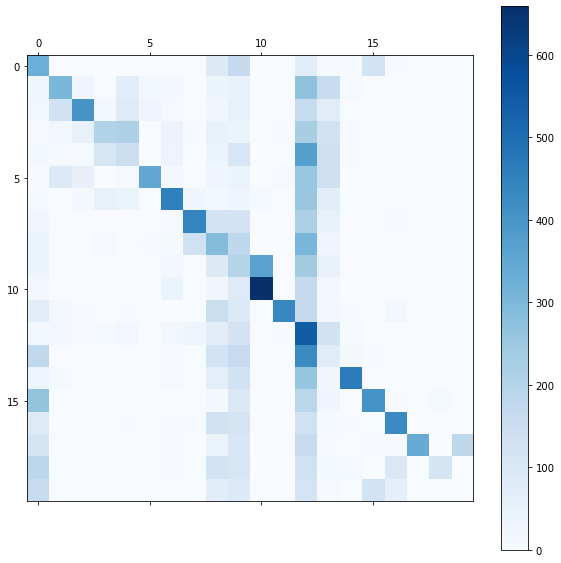

(18846, 50)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=50",0.323331,0.397227,0.356489,0.09656,0.354183


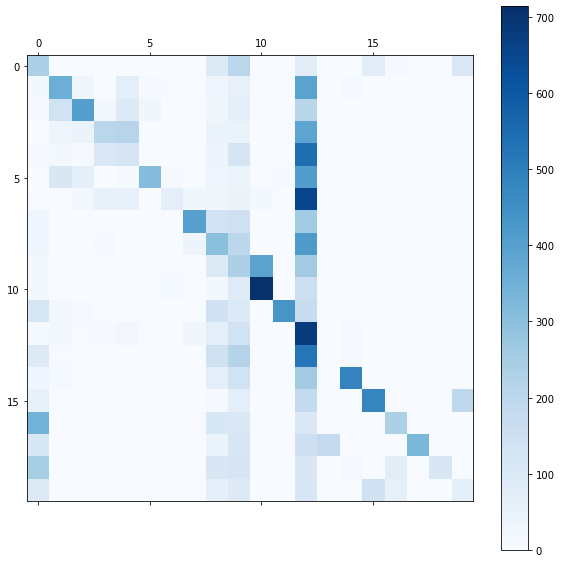

(18846, 100)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=100",0.323913,0.395065,0.355969,0.103616,0.353665


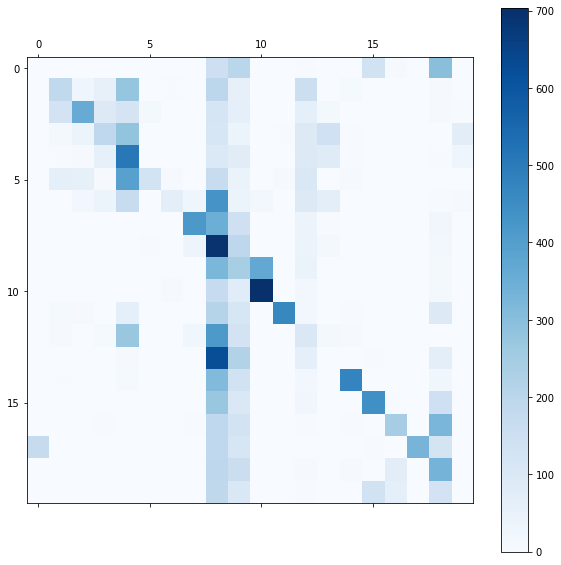

(18846, 300)
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=300",0.366713,0.466698,0.410708,0.113949,0.408553


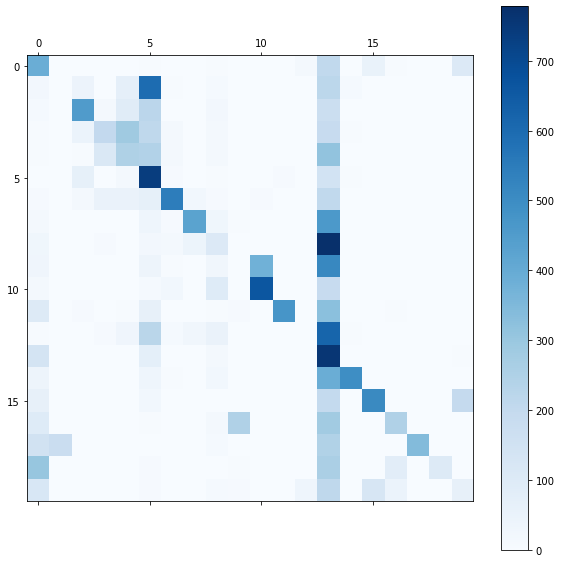

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, SVD r=1",0.024446,0.026639,0.025496,0.005427,0.022179
"K-means, SVD r=2",0.212922,0.225255,0.218915,0.065592,0.216317
"K-means, SVD r=3",0.247164,0.265546,0.256025,0.084386,0.253523
"K-means, SVD r=5",0.322384,0.349981,0.335616,0.127225,0.333376
"K-means, SVD r=10",0.326948,0.358146,0.341837,0.122807,0.339609
"K-means, SVD r=20",0.326029,0.371576,0.347315,0.109624,0.345062
"K-means, SVD r=50",0.323331,0.397227,0.356489,0.096560,0.354183
"K-means, SVD r=100",0.323913,0.395065,0.355969,0.103616,0.353665
"K-means, SVD r=300",0.366713,0.466698,0.410708,0.113949,0.408553


(18846, 1)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=1",0.024083,0.025959,0.024986,0.005209,0.021679


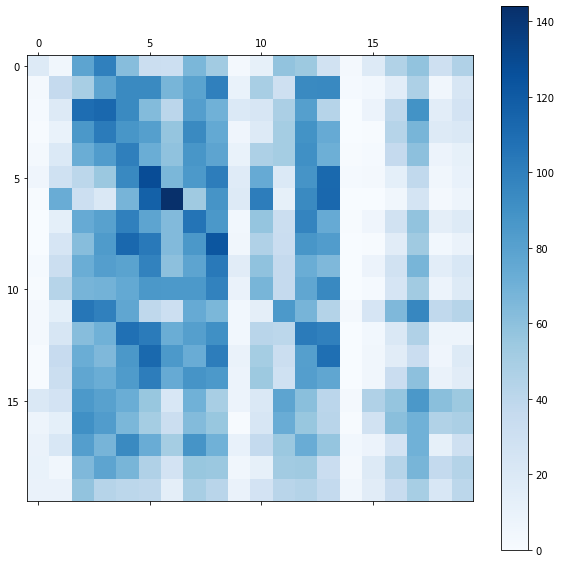

(18846, 2)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=2",0.190458,0.204402,0.197184,0.057121,0.194483


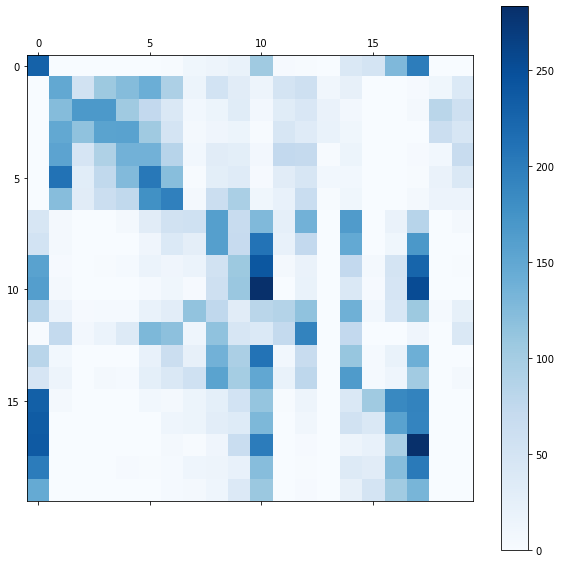

(18846, 3)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=3",0.21751,0.256413,0.235365,0.066833,0.232653


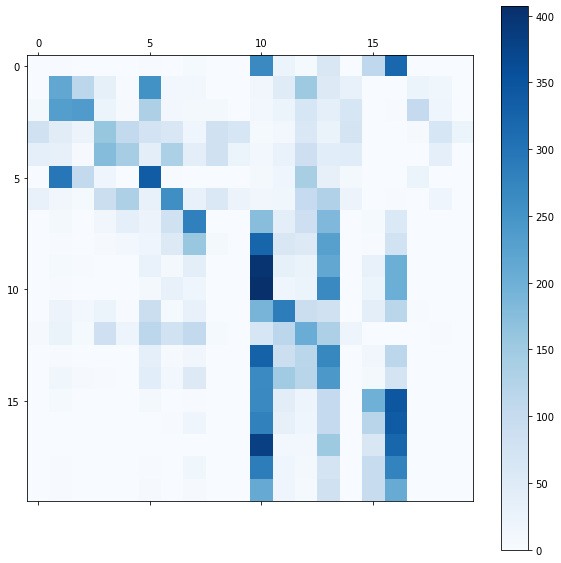

(18846, 5)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=5",0.268975,0.283941,0.276256,0.096103,0.273851


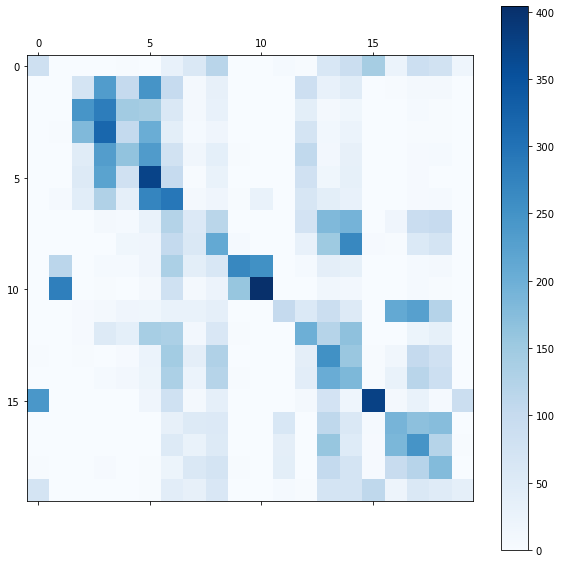

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(18846, 10)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=10",0.294018,0.325935,0.309155,0.105169,0.306801


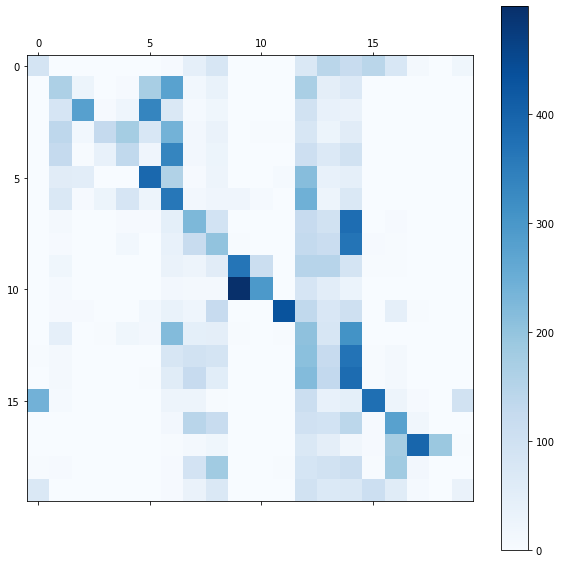

(18846, 20)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=20",0.291531,0.340852,0.314268,0.088493,0.311867


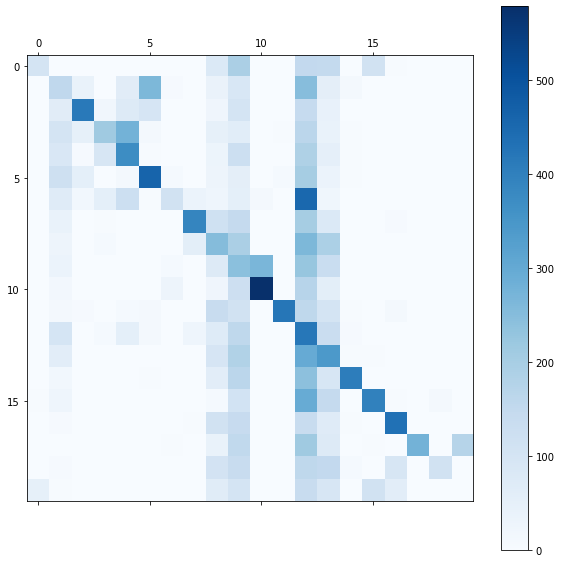

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(18846, 50)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=50",0.166149,0.227847,0.192167,0.036286,0.189066


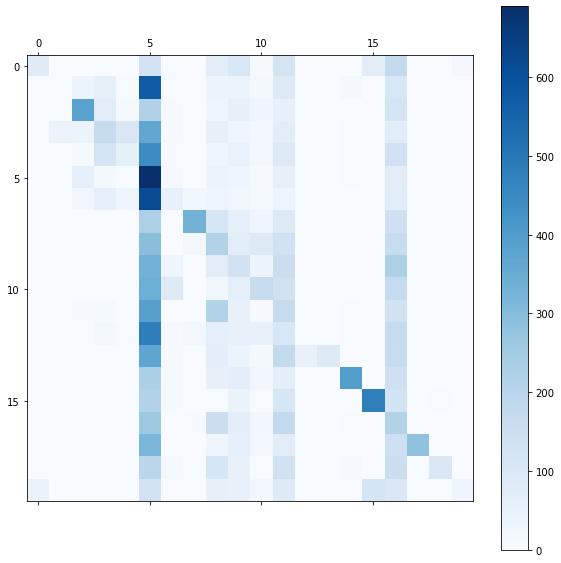

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(18846, 100)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=100",0.133835,0.185506,0.15549,0.024457,0.152252


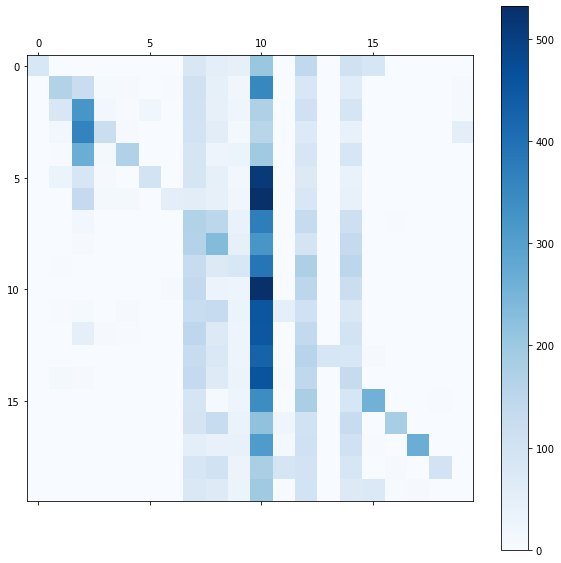

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(18846, 300)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=300",0.079104,0.10309,0.089518,0.014364,0.08621


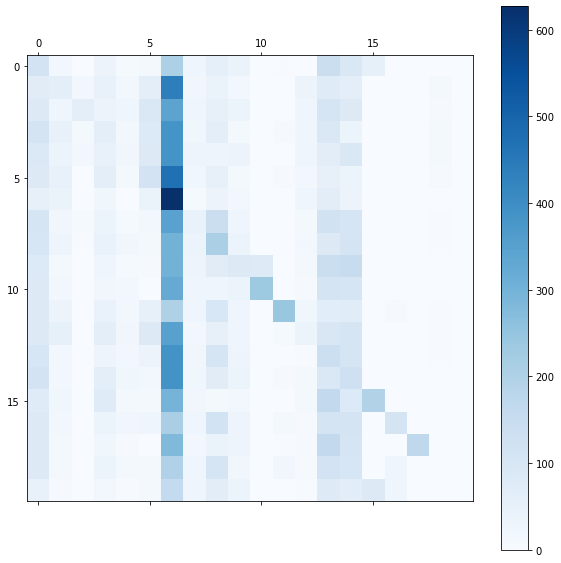

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
"K-means, NMF r=1",0.024083,0.025959,0.024986,0.005209,0.021679
"K-means, NMF r=2",0.190458,0.204402,0.197184,0.057121,0.194483
"K-means, NMF r=3",0.217510,0.256413,0.235365,0.066833,0.232653
"K-means, NMF r=5",0.268975,0.283941,0.276256,0.096103,0.273851
"K-means, NMF r=10",0.294018,0.325935,0.309155,0.105169,0.306801
"K-means, NMF r=20",0.291531,0.340852,0.314268,0.088493,0.311867
"K-means, NMF r=50",0.166149,0.227847,0.192167,0.036286,0.189066
"K-means, NMF r=100",0.133835,0.185506,0.155490,0.024457,0.152252
"K-means, NMF r=300",0.079104,0.103090,0.089518,0.014364,0.086210


In [277]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn import datasets
from pipelinehelper import PipelineHelper
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from scipy.optimize import linear_sum_assignment
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

#SVD
def SVD_kmeans_plot_Q9(total_k,tfidf_train,true_labels,r):
        TruncSVD_model = TruncatedSVD(n_components=r, random_state=0)
        reduced_tfidf = TruncSVD_model.fit_transform(tfidf_train)
        print(reduced_tfidf.shape)
        
        top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=total_k, init='k-means++', max_iter=1000, n_init=20)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
        print(km_predicted_labels.shape)
        print(true_labels.shape)
        
        table_name = "K-means, SVD r=" + str(r)
        currDf = report_scores_kmeans(true_labels, km_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
        #plot the cluster
#         plotTitle = "K-Means k = 20, SVD r = " + str(r) 
#         plot_cluster(km,reduced_tfidf,true_labels,"True Labels: SVD r = 2, K-Means k = 2")
#         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)
        
        #plot the contingency matrix
        plot_contingency(true_label_names,true_labels,km_predicted_labels)
        
        return currDf, top_r_variance, kmObj
        
#load the dataset. ALL 20 categories
dataset_Q9 = fetch_20newsgroups(subset='all',shuffle=True, random_state=None, remove = ['headers', 'footers'])

#get the total numnber of labels -> clusters
total_k = np.unique(dataset_Q9.target).shape[0]
print(total_k)
true_labels = np.unique(dataset_Q9.target)
true_label_names = np.unique(dataset_Q9.target_names)

#get the new tfidf
new_vect = TfidfVectorizer()
tfidf_dataset_Q9 = new_vect.fit_transform(dataset_Q9.data)

print(tfidf_dataset_Q9.shape)
    
#call function to tf-idf, perform k-means
# SVD_kmeans_plot_Q9(total_k,tfidf_dataset_Q9,dataset_Q9.target,2)   

r_array_SVD_Q9 = [1,2,3,5,10,20,50,100,300]
# r_array_SVD_Q9 = [2]
top_var_SVD_Q9 =[]
df_SVD = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_SVD_Q9)):
    SVD_df, top_var_SVD_Q9, kmObj = SVD_kmeans_plot_Q9(total_k,tfidf_dataset_Q9,dataset_Q9.target,r_array_SVD_Q9[i])
#     display(SVD_df)
    
    df_SVD = df_SVD.append(SVD_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_SVD)

#####################################################################################################################
#NMF
def NMF_kmeans_plot_Q9(total_k,tfidf_train,true_labels,r):
        NMF_model = NMF(n_components=r, init='random', random_state=0)
        reduced_tfidf = NMF_model.fit_transform(tfidf_train)
        print(reduced_tfidf.shape)
        
        top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=total_k, init='k-means++', max_iter=1000, n_init=20)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
        print(km_predicted_labels.shape)
        
        table_name = "K-means, NMF r=" + str(r)
        currDf = report_scores_kmeans(true_labels, km_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
        #plot the cluster
#         plotTitle = "K-Means k = 20, NMF r = " + str(r) 
#         plot_cluster(km,reduced_tfidf,true_labels,"True Labels: NMF, K-Means k = 20")        
#         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)      
        #plot the contingency matrix
    
        plot_contingency(true_label_names,true_labels,km_predicted_labels)
        
        return currDf, top_r_variance, kmObj

r_array_NMF_Q9 = [1,2,3,5,10,20,50,100,300]
# r_array = [1]
top_var_NMF_Q9 =[]
df_NMF = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_NMF_Q9)):
    NMF_df, top_var_NMF_Q9, kmObj = NMF_kmeans_plot_Q9(total_k,tfidf_dataset_Q9,dataset_Q9.target,r_array_NMF_Q9[i])
#     display(SVD_df)
    
    df_NMF = df_NMF.append(NMF_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_NMF)


# Question 10

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=2,0.203744,0.224708,0.213713,0.065989,0.211015


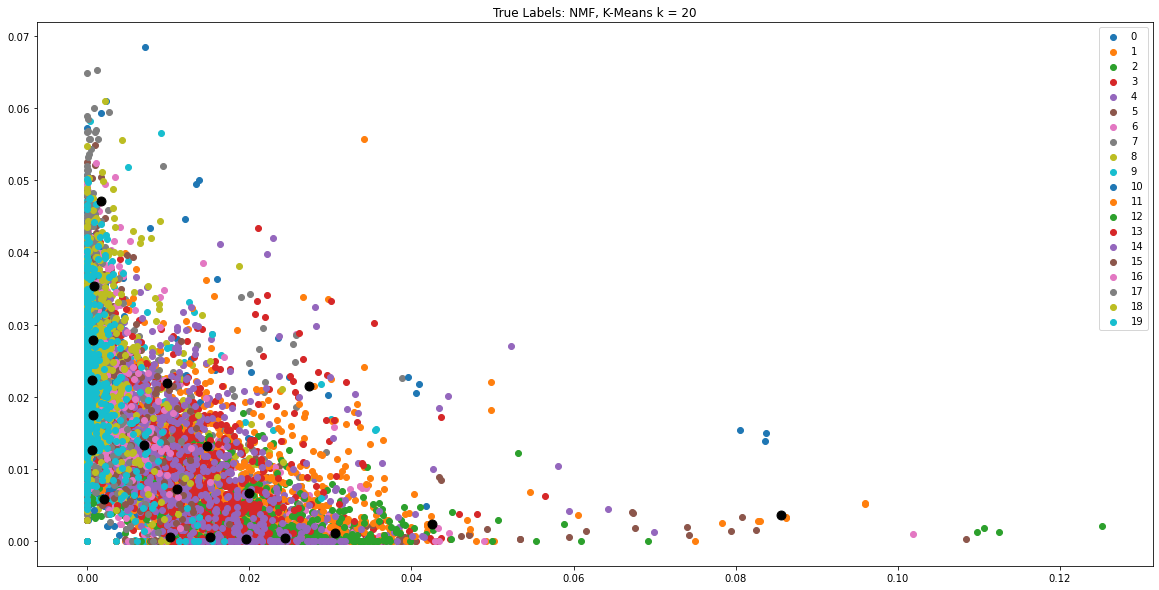

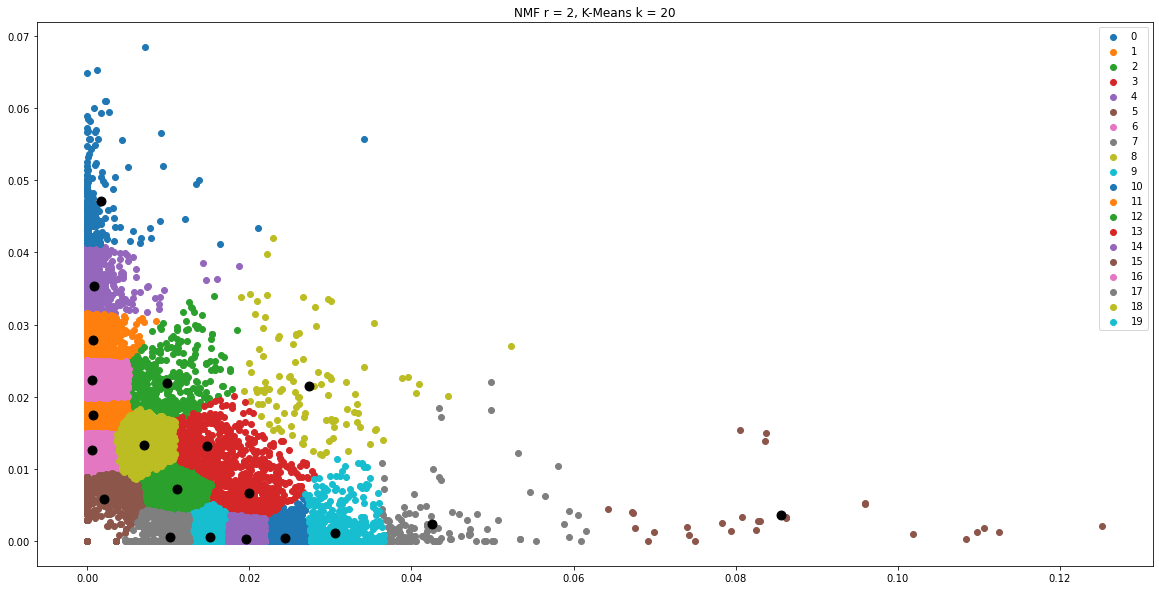

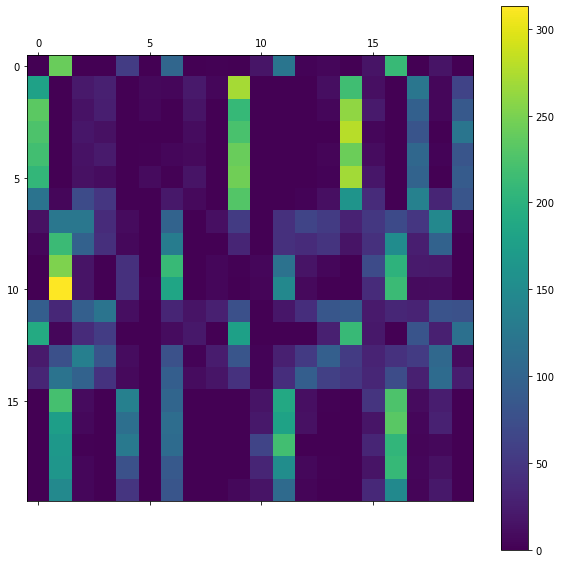

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=3,0.29348,0.320667,0.306471,0.111347,0.304102


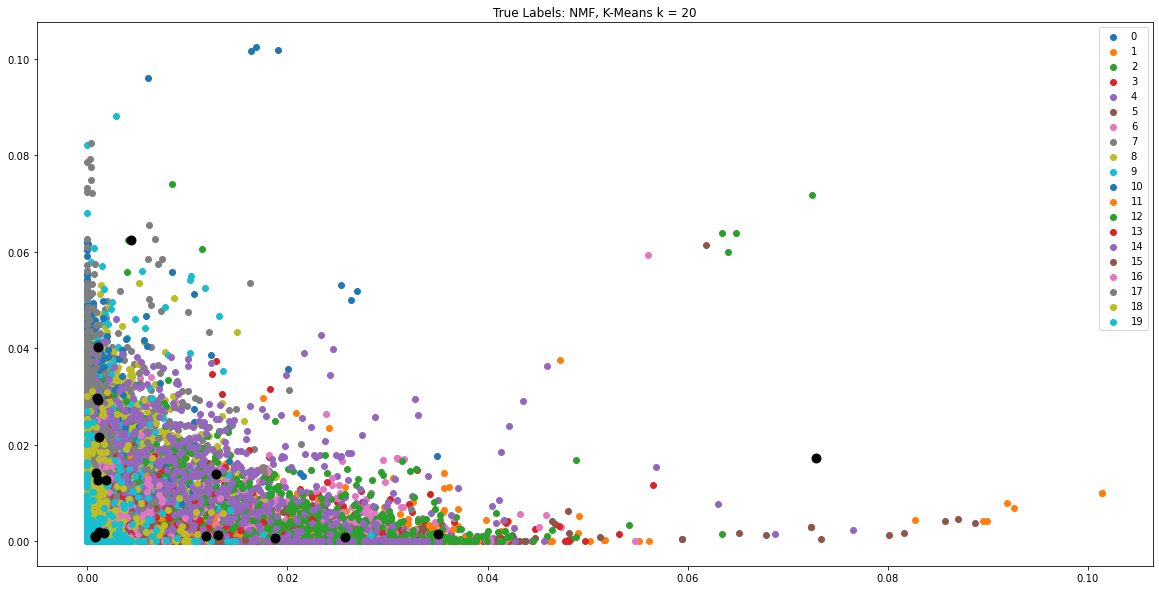

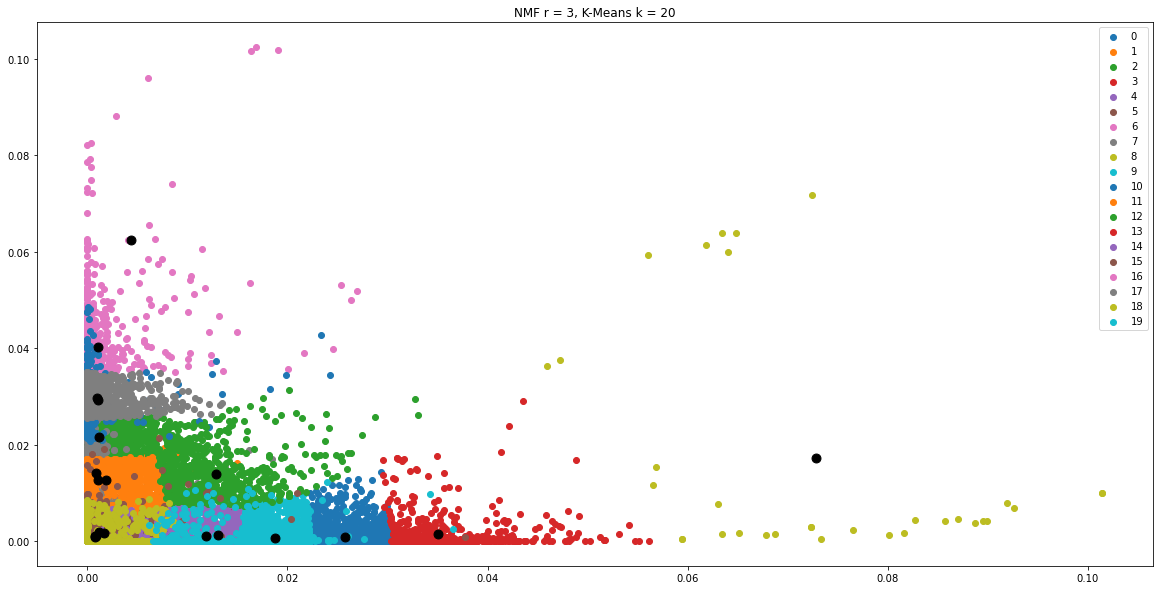

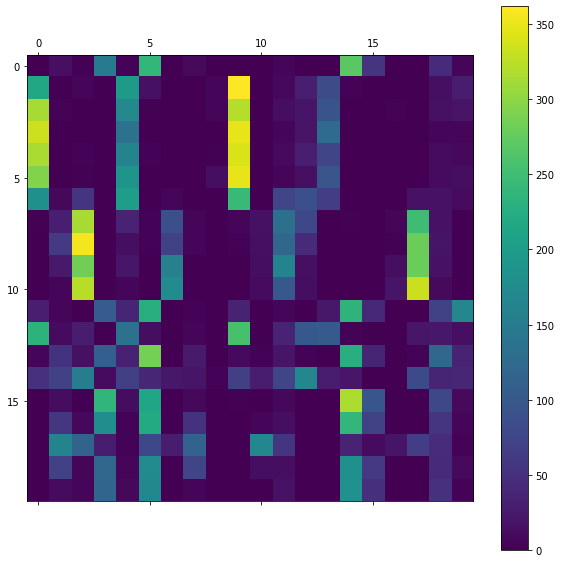

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=5,0.345524,0.365775,0.355361,0.152329,0.3532


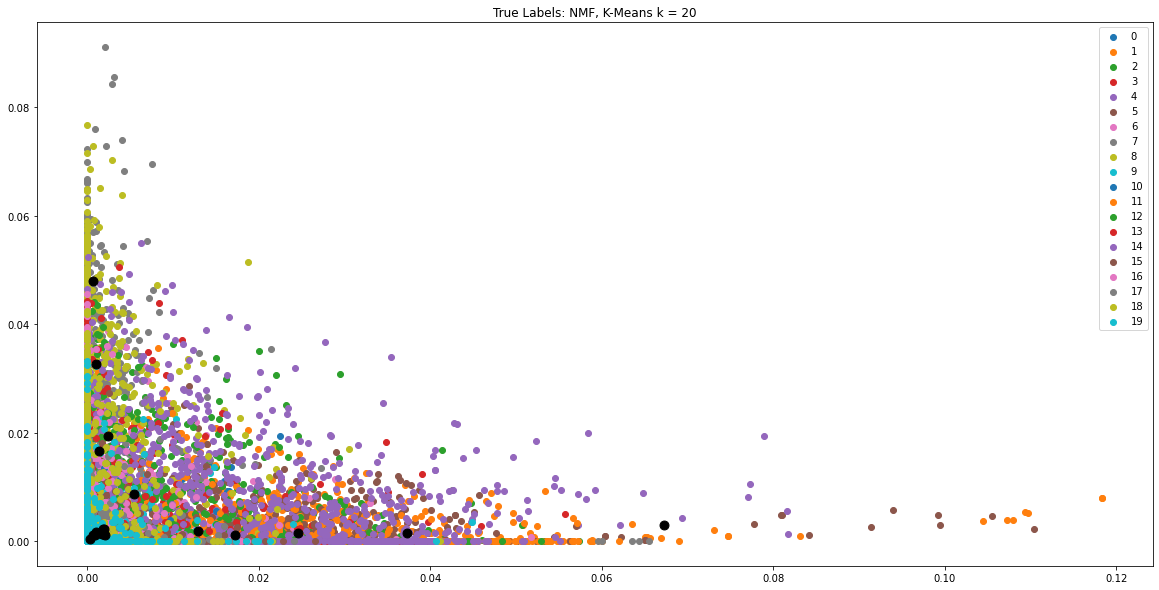

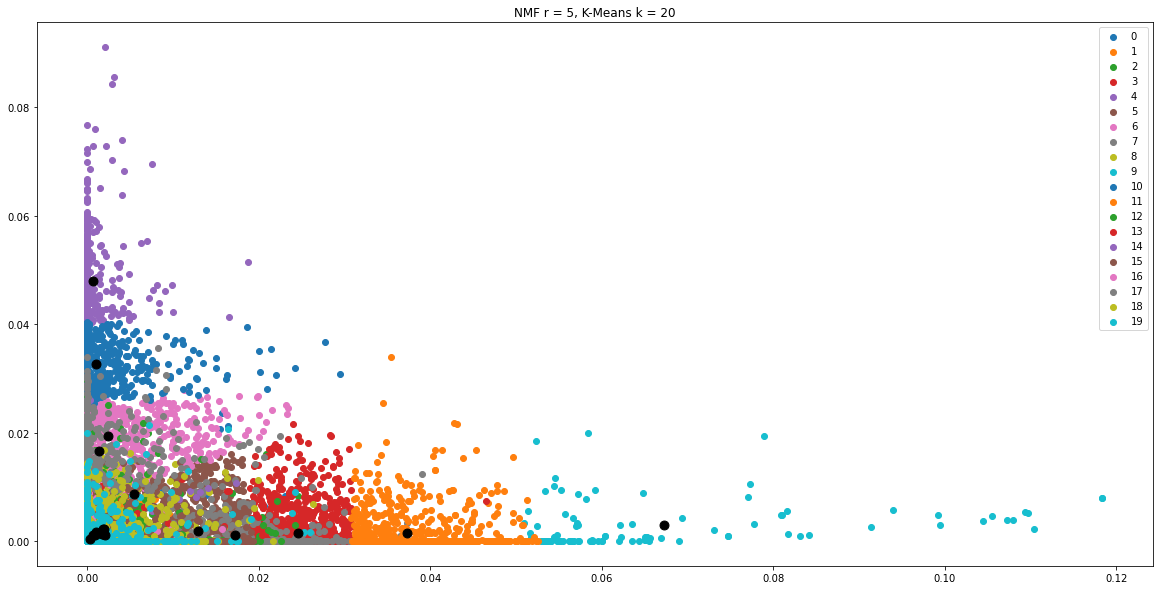

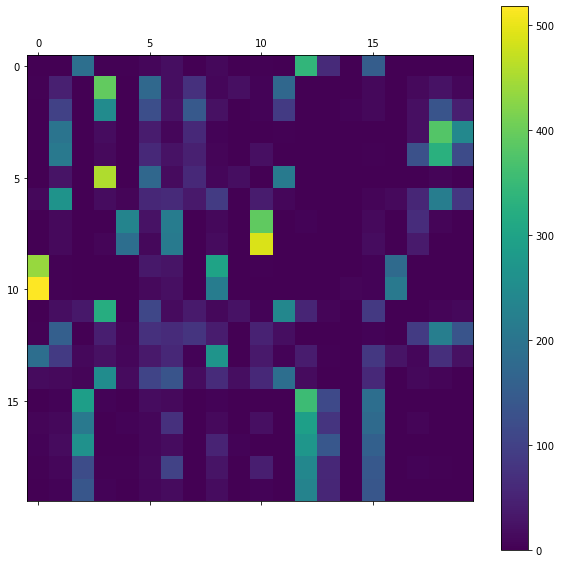

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=10,0.420965,0.437641,0.429141,0.219638,0.427255


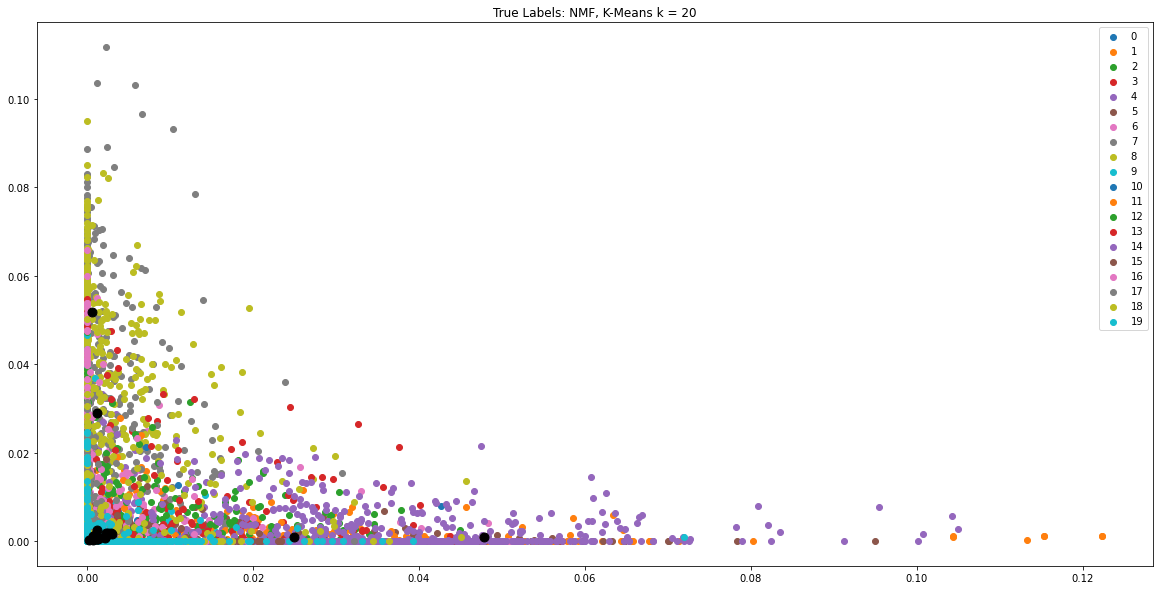

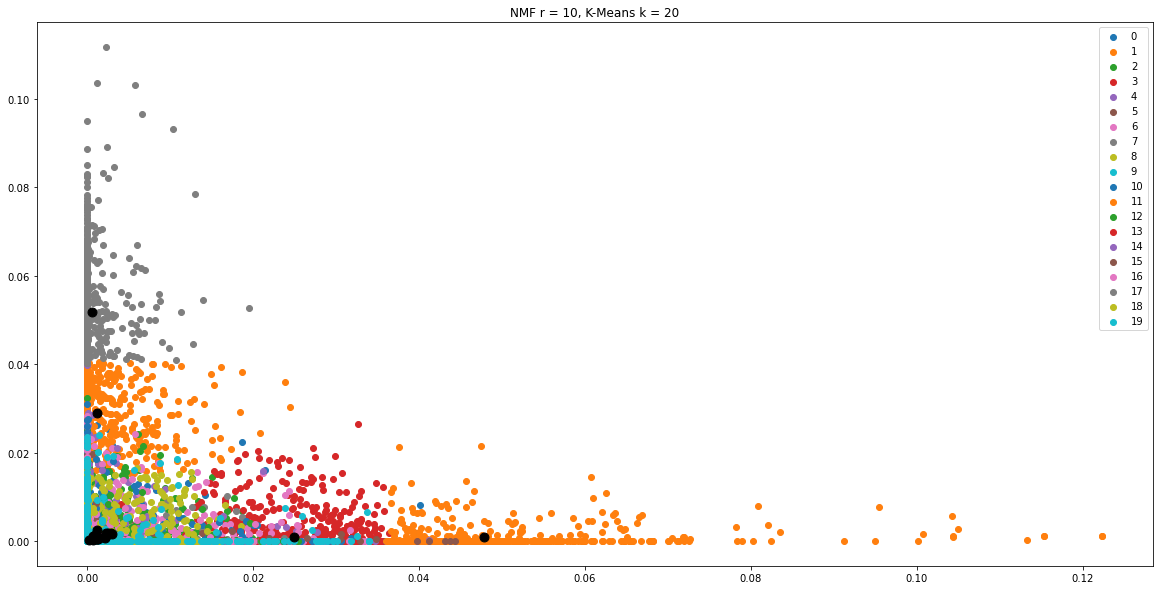

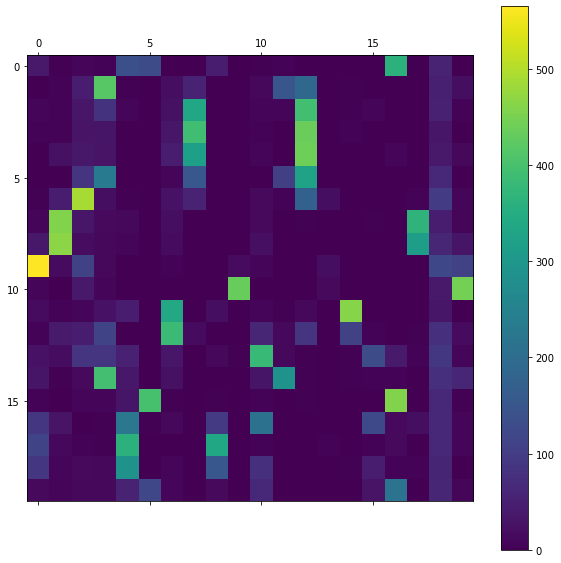

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=20,0.414564,0.438377,0.426138,0.233812,0.424233


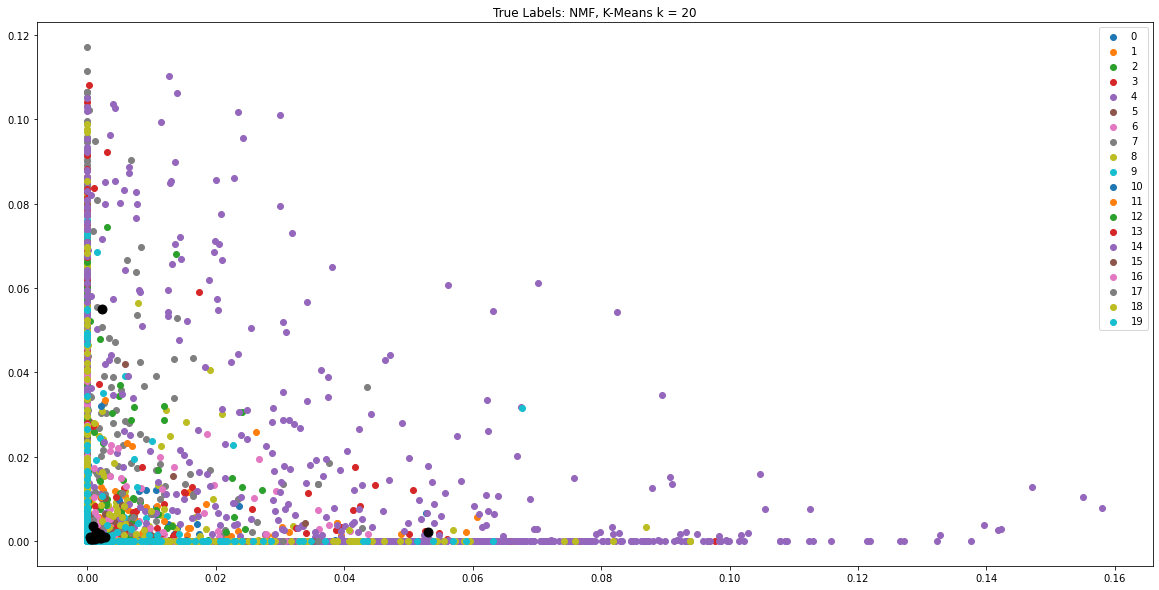

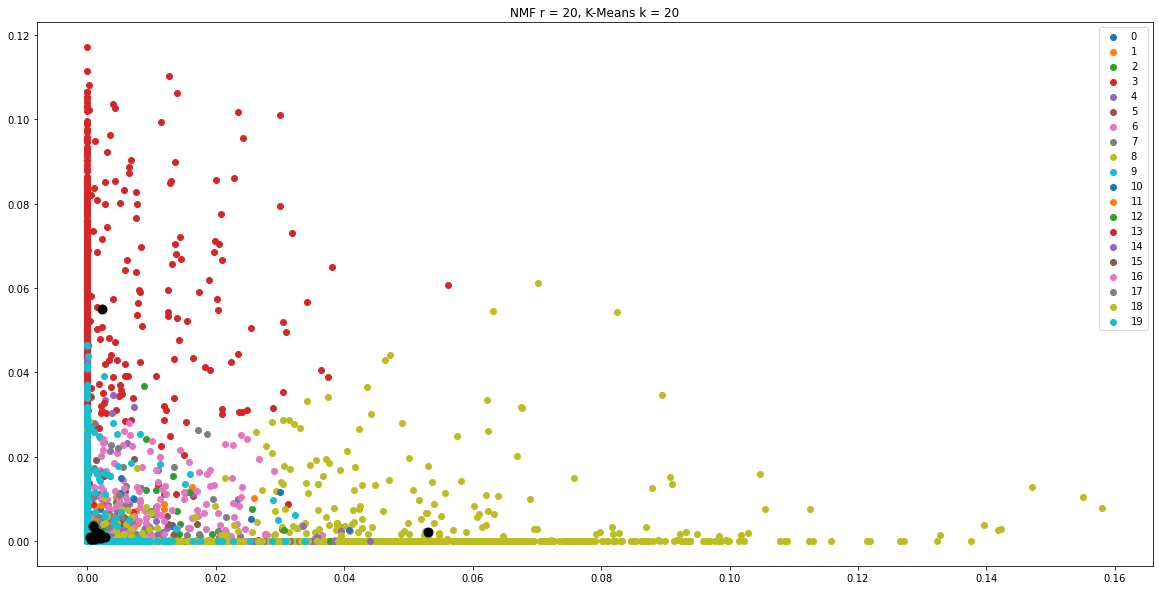

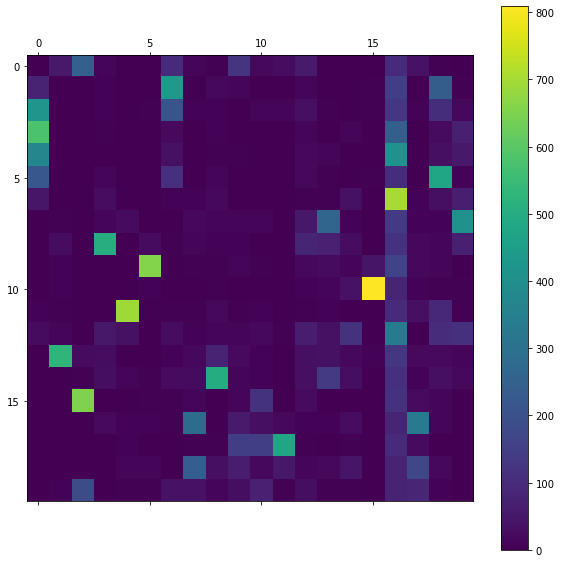

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
SVD r=50,0.282097,0.387979,0.326673,0.065013,0.32414


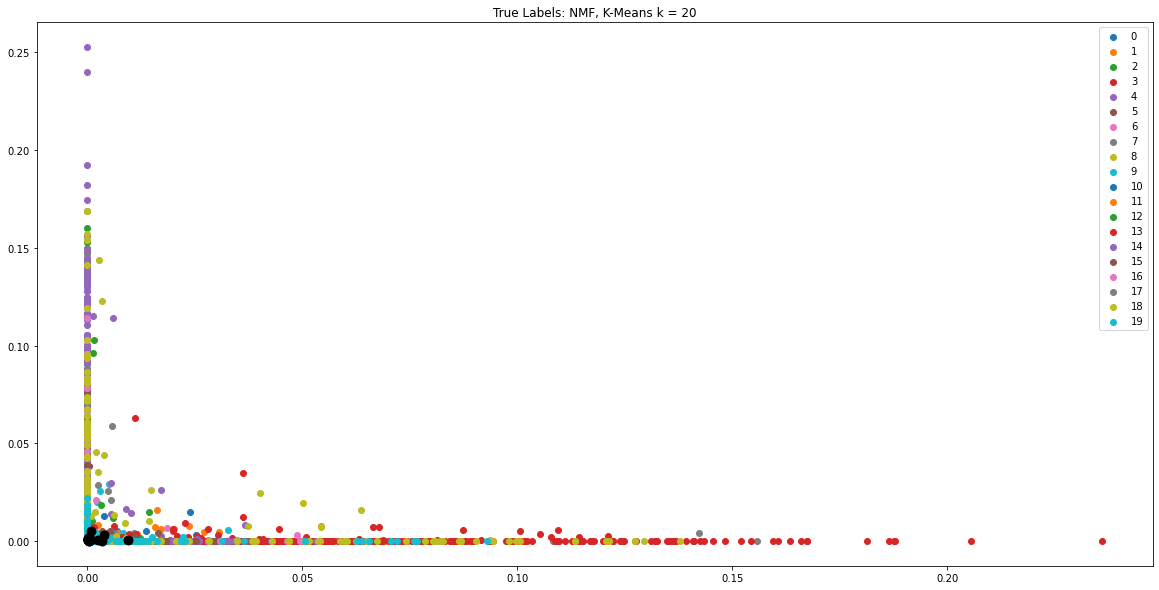

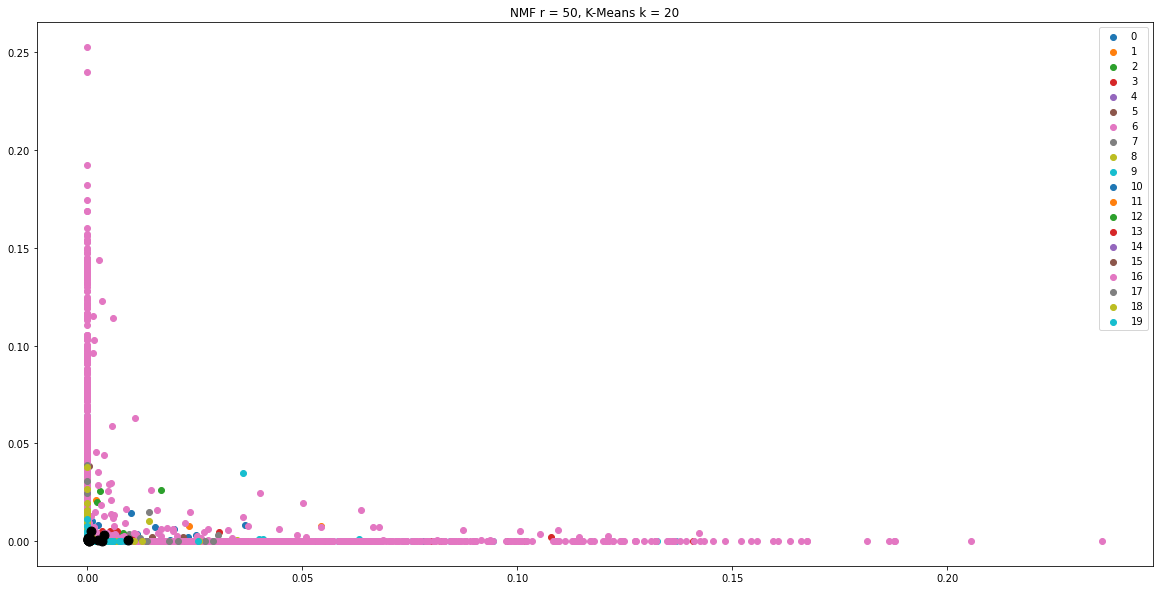

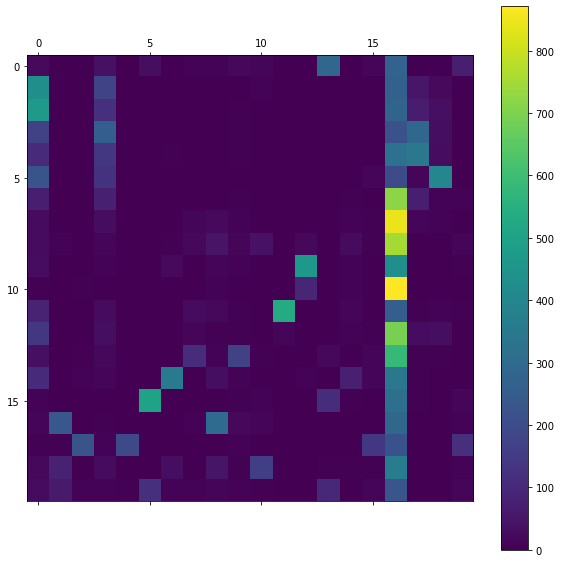

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-147-11588a44b3eb>", line 51, in <module>
    NMF_df_Q10, top_var_NMF_Q10, kmObj = NMF_kmeans_plot_Q10(total_k,tfidf_dataset_Q9,dataset_Q9.target,r_array_NMF_Q10[i])
  File "<ipython-input-147-11588a44b3eb>", line 3, in NMF_kmeans_plot_Q10
    reduced_tfidf = NMF_model.fit_transform(tfidf_train)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py", line 1283, in fit_transform
    W, H, n_iter_ = non_negative_factorization(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py", line 1067, in non_negative_factorization
    W, H, n_iter = _fit_multiplicative_update(X, W, H, beta_loss, max_iter,


TypeError: object of type 'NoneType' has no len()

In [147]:
def NMF_kmeans_plot_Q10(total_k,tfidf_train,true_labels,r):
        NMF_model = NMF(n_components=r, init='random', solver='mu',beta_loss='kullback-leibler',random_state=0)
        reduced_tfidf = NMF_model.fit_transform(tfidf_train)
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
#         top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=total_k, init='k-means++', max_iter=1000, n_init=20)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
        print(np.unique(km_predicted_labels))
        
        table_name = "K-means init = 20, NMF r=" + str(r) + " beta_loss='kullback-leibler'"
        currDf = report_scores_kmeans(true_labels, km_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
        #plot the cluster
#         plotTitle = "NMF r = " + str(r) +", K-Means k = 20"
#         plot_cluster(km,reduced_tfidf,true_labels,"True Labels: NMF, K-Means k = 20") 
#         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)
        
        #plot the contingency matrix
        plot_contingency(true_label_names,true_labels,km_predicted_labels)
        
        return currDf, top_r_variance, kmObj
        
# #load the dataset. ALL 20 categories
# dataset_Q9 = fetch_20newsgroups(subset='all',shuffle=True, random_state=None, remove = ['headers', 'footers'])

# #get the total numnber of labels -> clusters
# total_k = np.unique(dataset_Q9.target).shape[0]
# true_labels = np.unique(dataset_Q9.target)
# true_label_names = np.unique(dataset_Q9.target_names)

# #get the new tfidf
# new_vect = TfidfVectorizer(min_df=3, stop_words='english')
# tfidf_dataset_Q9 = new_vect.fit_transform(dataset_Q9.data)

# print(tfidf_dataset_Q9.shape)
    
#call function to tf-idf, perform k-means
# NMF_kmeans_plot_Q10(total_k,tfidf_dataset_Q9,dataset_Q9.target,2) 

from sklearn.decomposition import TruncatedSVD

r_array_NMF_Q10 = [1,2,3,5,10,20,50,100,300]
# r_array = [1]
top_var_NMF_Q10 =[]
df_NMF_Q10 = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_NMF_Q10)):
    NMF_df_Q10, top_var_NMF_Q10, kmObj = NMF_kmeans_plot_Q10(total_k,tfidf_dataset_Q9,dataset_Q9.target,r_array_NMF_Q10[i])
#     display(SVD_df)
    
    df_NMF_Q10 = df_NMF_Q10.append(NMF_df_Q10)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_NMF_Q10)



# Question 11

['talk.religion.misc', 'talk.politics.misc', 'talk.politics.mideast', 'talk.politics.guns', 'soc.religion.christian', 'sci.space', 'sci.med', 'sci.electronics', 'sci.crypt', 'rec.sport.hockey', 'rec.sport.baseball', 'rec.motorcycles', 'rec.autos', 'misc.forsale', 'comp.windows.x', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.os.ms-windows.misc', 'comp.graphics', 'alt.atheism']
[-5.9661493 -5.9661317 -5.9661274 ... 20.787012  20.787018  20.787045 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=2 Metric=euclidean,0.009359,0.00989,0.009617,0.00153,0.006339


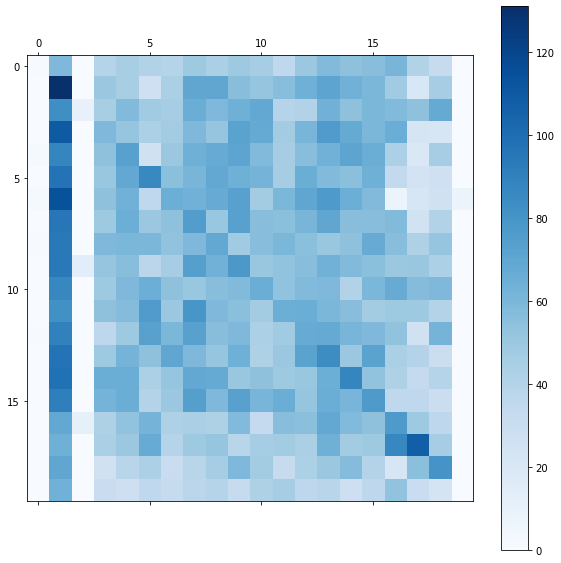

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 484 edges.
It has only fully disconnected 17 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-15.446043 -15.446037 -15.446012 ...  11.277055  11.279885  11.281138]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=2 Metric=cosine,0.559105,0.576343,0.567593,0.443776,0.566164


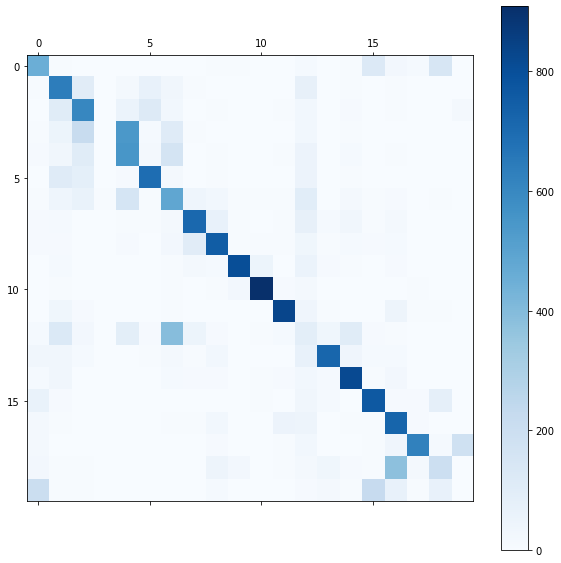

[-2.8415868 -2.8415713 -2.8415704 ... 17.602465  17.602474  17.602476 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=3 Metric=euclidean,0.012233,0.012796,0.012508,0.001628,0.009242


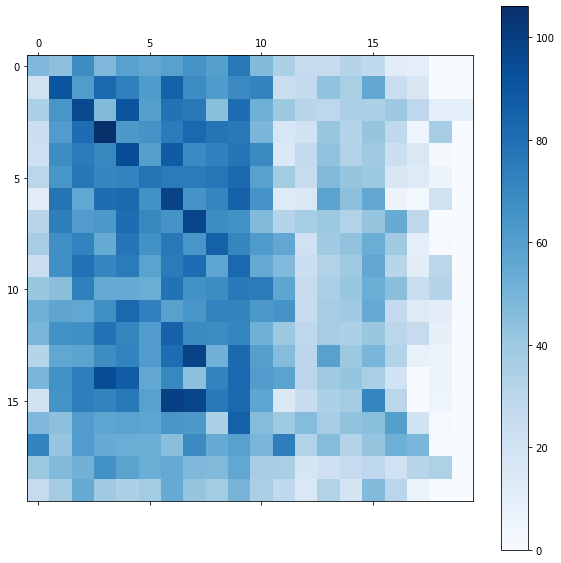

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 462 edges.
It has only fully disconnected 16 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-6.517925  -6.5171585 -6.516882  ... 14.983057  14.999906  15.01645  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=3 Metric=cosine,0.57262,0.582042,0.577293,0.464865,0.575906


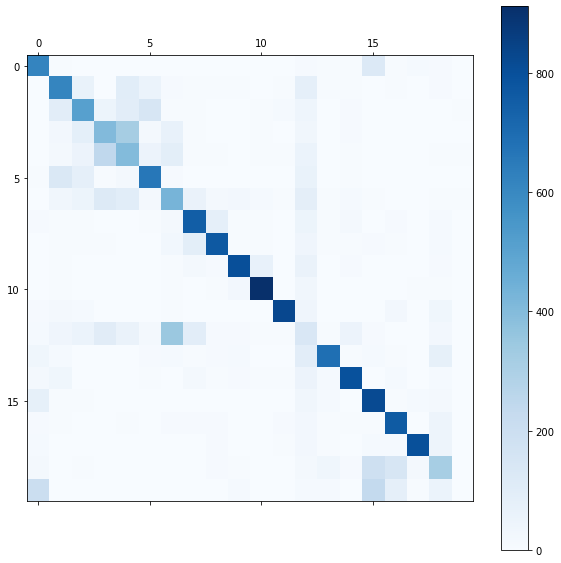

[-3.547866  -3.5478537 -3.5478463 ... 17.385206  17.38521   17.385223 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=5 Metric=euclidean,0.007878,0.008222,0.008046,0.000978,0.004788


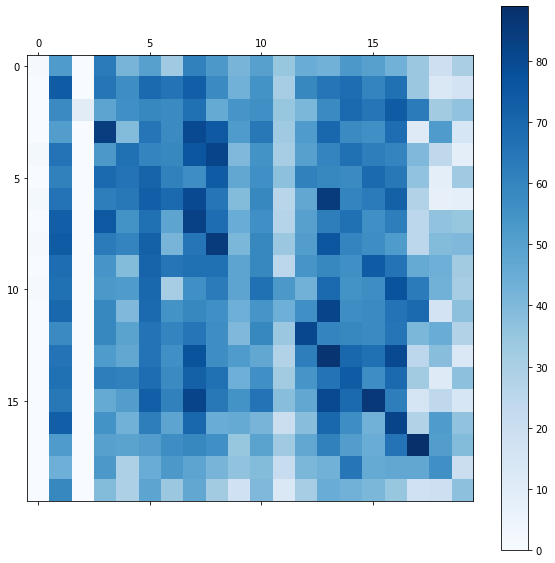

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 370 edges.
It has only fully disconnected 14 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-6.2592864 -6.209983  -6.2057624 ... 17.44734   17.447392  17.44745  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=5 Metric=cosine,0.572024,0.601319,0.586306,0.456932,0.584925


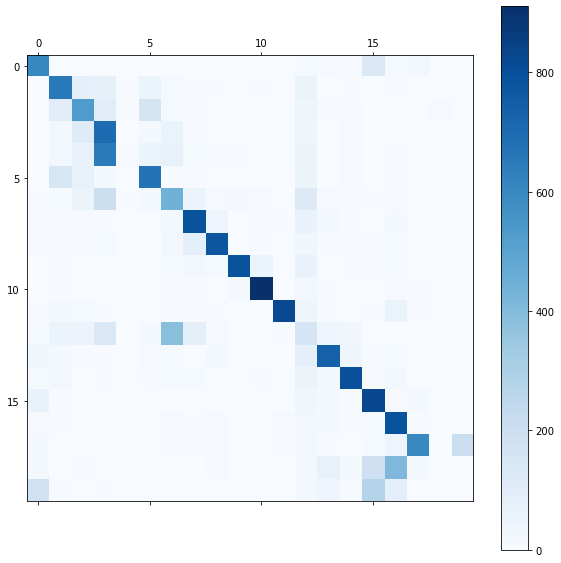

[-2.9566362 -2.9566345 -2.956614  ... 17.23189   17.231901  17.231915 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=10 Metric=euclidean,0.008822,0.009401,0.009102,0.001339,0.005823


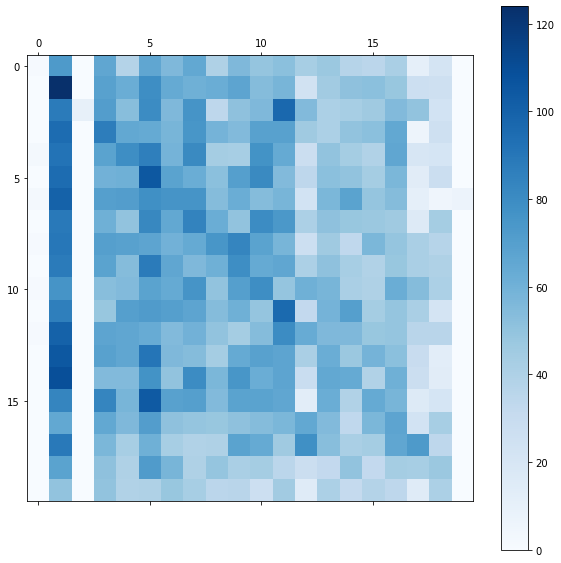

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 522 edges.
It has only fully disconnected 21 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-5.6048803 -5.6048737 -5.6048713 ... 12.112614  12.113751  12.12085  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=10 Metric=cosine,0.568919,0.593796,0.581091,0.445793,0.579698


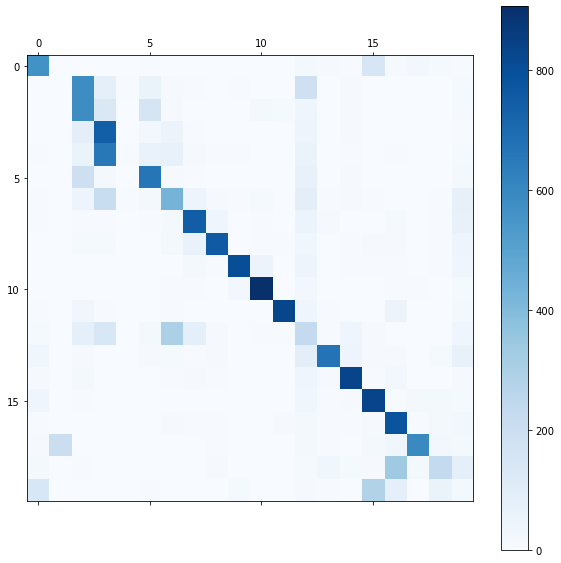

[-0.95359063 -0.92617285 -0.92142916 ... 11.644783   11.64792
 11.65665   ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=20 Metric=euclidean,0.008749,0.009071,0.008907,0.001761,0.005628


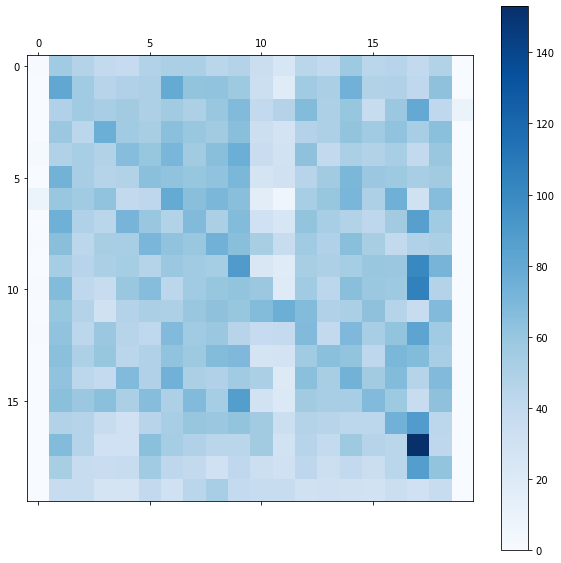

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 730 edges.
It has only fully disconnected 16 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[ 0.04496926  0.04650974  0.04654122 ... 13.825192   13.825235
 13.825638  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=20 Metric=cosine,0.543222,0.591116,0.566158,0.424149,0.564715


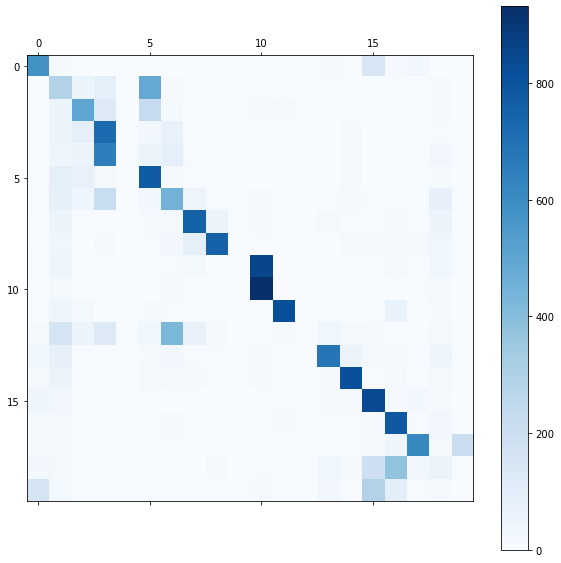

[-1.8821172 -1.881966  -1.8817339 ... 10.48242   10.482485  10.482742 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=50 Metric=euclidean,0.008685,0.00908,0.008878,0.001285,0.005589


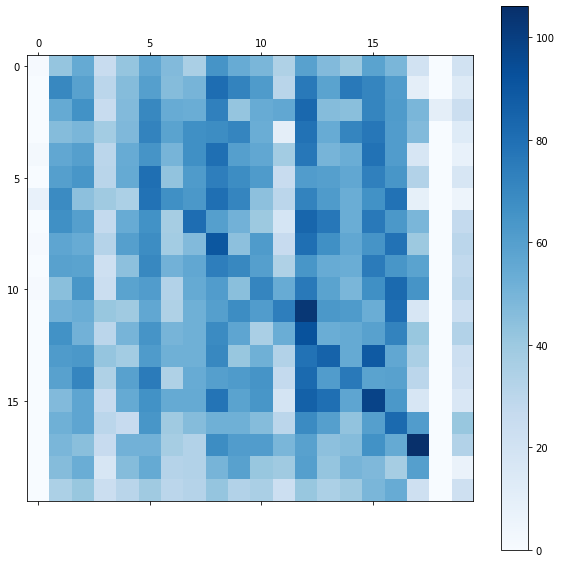

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 478 edges.
It has only fully disconnected 13 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-0.8774116  -0.85829335 -0.8582603  ... 11.778352   11.778356
 11.778357  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=50 Metric=cosine,0.5584,0.613594,0.584698,0.426473,0.583292


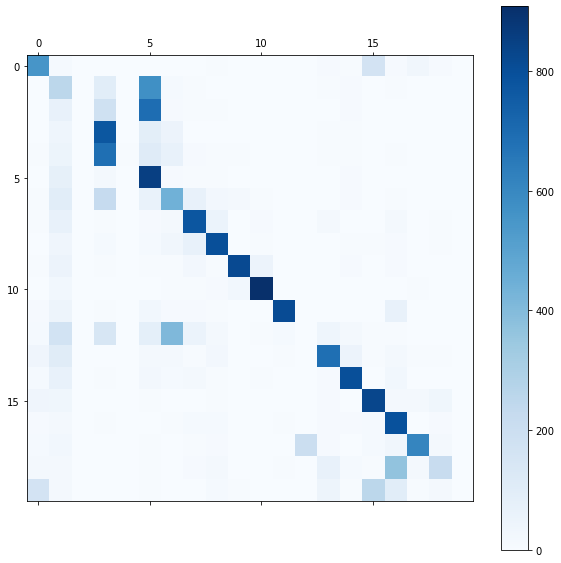

[ 1.8990133  1.8990148  1.8990177 ... 16.872465  16.872469  16.872477 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=100 Metric=euclidean,0.008549,0.009175,0.008851,0.00138,0.005575


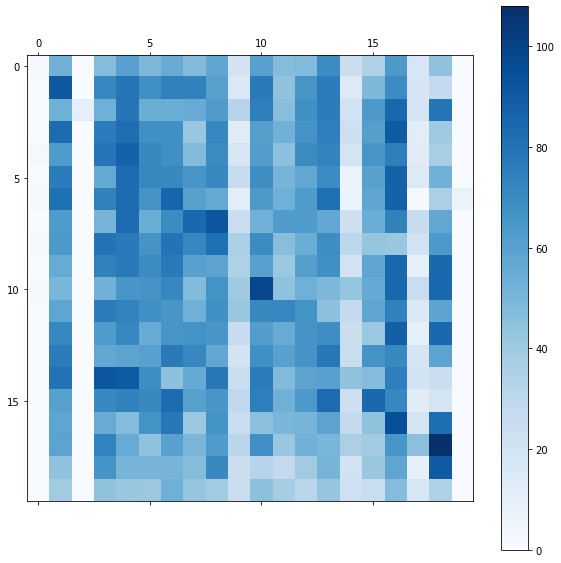

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 458 edges.
It has only fully disconnected 13 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-0.25801808 -0.24468876 -0.2246659  ... 18.378294   18.378384
 18.378544  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=100 Metric=cosine,0.552207,0.604469,0.577157,0.440737,0.57573


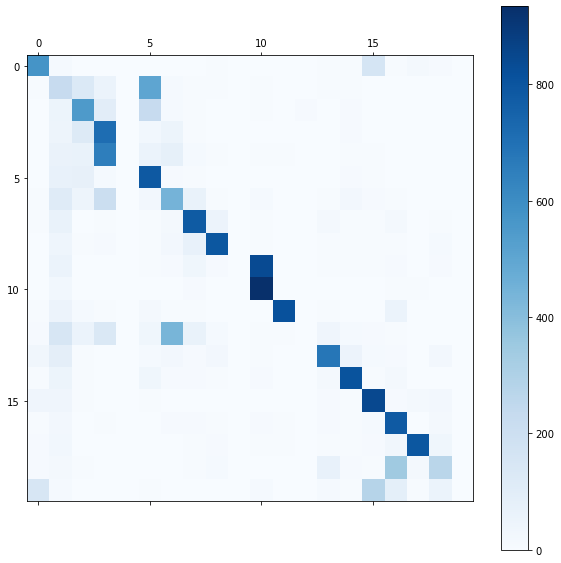

[-1.3175185 -1.316416  -1.3091434 ... 17.385004  17.385006  17.385015 ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=300 Metric=euclidean,0.006731,0.007506,0.007097,0.00122,0.004111


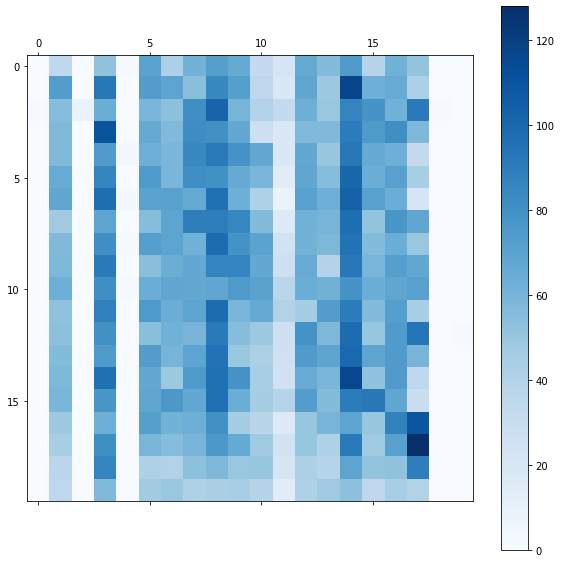

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 422 edges.
It has only fully disconnected 19 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-0.6172152  -0.61432457 -0.6089043  ... 16.833157   16.83338
 16.833673  ]
(18846,)
(18846,)


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=300 Metric=cosine,0.524741,0.63042,0.572747,0.401317,0.571557


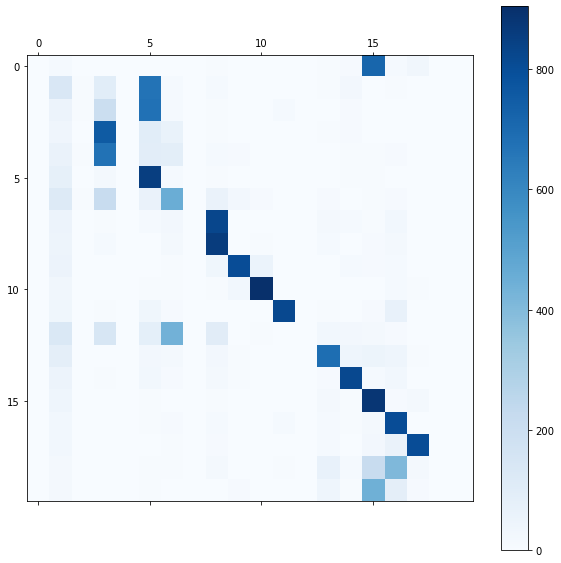

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=2 Metric=euclidean,0.009359,0.009890,0.009617,0.001530,0.006339
K-means n_init=20 UMAP r=2 Metric=cosine,0.559105,0.576343,0.567593,0.443776,0.566164
K-means n_init=20 UMAP r=3 Metric=euclidean,0.012233,0.012796,0.012508,0.001628,0.009242
K-means n_init=20 UMAP r=3 Metric=cosine,0.572620,0.582042,0.577293,0.464865,0.575906
K-means n_init=20 UMAP r=5 Metric=euclidean,0.007878,0.008222,0.008046,0.000978,0.004788
K-means n_init=20 UMAP r=5 Metric=cosine,0.572024,0.601319,0.586306,0.456932,0.584925
K-means n_init=20 UMAP r=10 Metric=euclidean,0.008822,0.009401,0.009102,0.001339,0.005823
K-means n_init=20 UMAP r=10 Metric=cosine,0.568919,0.593796,0.581091,0.445793,0.579698
K-means n_init=20 UMAP r=20 Metric=euclidean,0.008749,0.009071,0.008907,0.001761,0.005628
K-means n_init=20 UMAP r=20 Metric=cosine,0.543222,0.591116,0.566158,0.424149,0.564715


In [266]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
from sklearn import metrics


def umap_kmeans_plot_Q11(total_k,class_names,tfidf_train,true_labels,r,metric_type):
        umap_model = umap.UMAP(n_components=r,metric=metric_type)
        reduced_tfidf = umap_model.fit_transform(tfidf_train)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)
#         print(np.unique(reduced_tfidf))
        
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
#         top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=total_k, init='k-means++', max_iter=1000, n_init=20)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
        
        table_name = "K-means n_init=20 UMAP r=" + str(r) + " Metric=" + metric_type
#         print(km_predicted_labels.shape)
#         print(true_labels.shape)
        currDf = report_scores_kmeans(true_labels, km_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
#         #plot the cluster
#         plotTitle = "UMAP r = " + str(r) +", K-Means k = 20 Metric Type " + metric_type
# #         plot_cluster(km,reduced_tfidf,true_labels,"True Labels: UMAP, K-Means k = 20") 
# #         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)
# #         plot_cluster_nicely(km,class_names,reduced_tfidf,true_labels,"True Labels: UMAP, K-Means k = 20") 
#         plot_cluster_map(km,class_names,reduced_tfidf,km_predicted_labels,plotTitle)
# #         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)
        
        #plot the contingency matrix
        plot_contingency(true_label_names,true_labels,km_predicted_labels)
        
        return currDf, top_r_variance, kmObj

from sklearn.decomposition import TruncatedSVD

class_names = dataset_Q9.target_names[::-1]
print(class_names)
r_array_UMAP = [1,2,3,5,10,20,50,100,300]
umap_metrics = ['euclidean', 'cosine']
# r_array_UMAP = [2]
top_var_UMAP =[]
df_UMAP = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_UMAP)):
    for j in range(len(umap_metrics)):
        UMAP_df, top_var_UMAP, kmObj = umap_kmeans_plot_Q11(total_k,class_names,tfidf_dataset_Q9,dataset_Q9.target,r_array_UMAP[i], umap_metrics[j])
#     display(SVD_df)
    
        df_UMAP = df_UMAP.append(UMAP_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_UMAP)


# Question 13

In [394]:
from sklearn.cluster import AgglomerativeClustering

def plot_cluster_Agglomerative(kmObj,tfidf_reduced,label,plotName):
    #Getting unique labels
    all_labels = np.unique(label)
#     print(all_labels)
    
    plt.figure(figsize=(20,10))
    
    #plotting the results:
    for i in all_labels:
        plt.scatter(tfidf_reduced[label == i , 0] , tfidf_reduced[label == i , 1] , label = i)
        
    plt.title(plotName)
    plt.legend()
    plt.show()

def umap_agglo_plot_Q12(total_k,tfidf_train,true_labels,r,metric_type,linkcrit):
        umap_model = umap.UMAP(n_components=r,metric=metric_type)
        reduced_tfidf = umap_model.fit_transform(tfidf_train)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)

        agglo = AgglomerativeClustering(n_clusters=total_k,linkage=linkcrit)
        agglo_predicted_labels = agglo.fit_predict(reduced_tfidf)
        print(np.unique(agglo_predicted_labels))
        
        table_name = "Agglomerative UMAP r=" + str(r) + " Metric=" + metric_type + " LinkageCriteria=" + linkcrit
        currDf = report_scores_kmeans(true_labels, agglo_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
#         #plot the cluster
#         plotTitle = "Agglomerative UMAP r = " + str(r) +", Metric Type " + metric_type + " Linkage Criteria " + linkcrit
#         plot_cluster_Agglomerative(agglo,reduced_tfidf,true_labels,"True Labels: Agglomerative UMAP") 
#         plot_cluster_Agglomerative(agglo,reduced_tfidf,agglo_predicted_labels,plotTitle)
        
        #plot the contingency matrix
        plot_contingency(class_names,true_labels,agglo_predicted_labels,table_name)
        
        return currDf, top_r_variance, kmObj

from sklearn.decomposition import TruncatedSVD

r_array_UMAP = [1,2,3,5,10,20,50,100,300]
# r_array_UMAP = [2]
umap_metrics = ['euclidean', 'cosine']
linkage_criteria = ['ward', 'single']
# r_array_UMAP = [2]
top_var_UMAP =[]
df_agglo = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_UMAP)):
    for j in range(len(umap_metrics)):
        for k in range(len(linkage_criteria)):
            agglo_df, top_var_UMAP, kmObj = umap_agglo_plot_Q12(total_k,true_label_names,tfidf_dataset_Q9,dataset_Q9.target,r_array_UMAP[i], umap_metrics[j], linkage_criteria[k])
    
            df_agglo = df_agglo.append(agglo_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_agglo)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



# Question 14

/opt/anaconda3/lib/python3.8/site-packages/umap/umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 403 edges.
It has only fully disconnected 20 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


[-1  0  1  2  3  4  5  6  7  8  9]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=5 Metric=cosine,0.441893,0.638756,0.522393,0.245138,0.521435


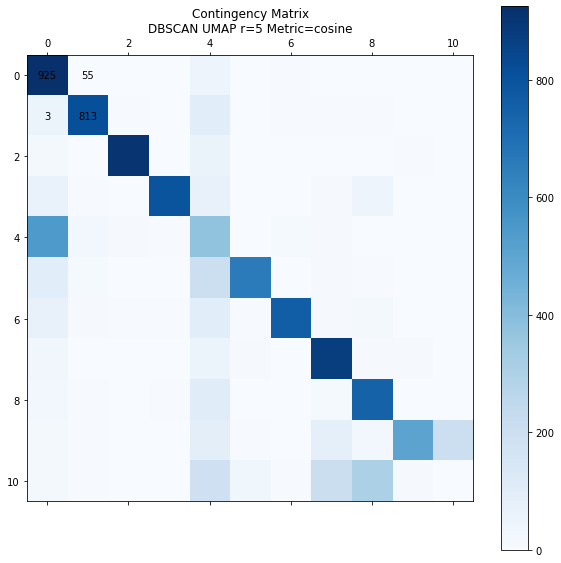

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=5 Metric=cosine,0.441893,0.638756,0.522393,0.245138,0.521435


In [393]:
from sklearn.cluster import DBSCAN

def plot_contingency_Q14(true_label_names,true_labels,predict_labels,plotName):
    label_format = '{:,.0f}'
        
    #get the contingency matrix for the k=2 clustering classifier
    contingencyMatrix = contingency_matrix(true_labels,predict_labels)
    rows, cols = linear_sum_assignment(contingencyMatrix, maximize=True)
    
    #produce the permuted contingency matrix
    contingencyMatrixPermuted = contingencyMatrix[rows[:, np.newaxis],cols]

#     display(contingencyMatrix)

    #plot contingency
    figure_contingency = plt.figure(figsize=(10,10))
    axes_contingency = figure_contingency.add_subplot(111)
    # using the matshow() function 
    caxes_cont = axes_contingency.matshow(contingencyMatrixPermuted, cmap=plt.cm.Blues)
#     cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
#     caxes_cont.set_ticks(np.arange(21))
#     caxes_cont.set_ticklabels(true_label_names)

    plotName = "Contingency Matrix\n" + plotName
    plt.title(plotName);
    figure_contingency.colorbar(caxes_cont)
    
    #add contingency matrix values to each element
    for i in range(len(true_label_names)):
        for j in range(len(true_label_names)):
            axes_contingency.text(i, j, str(contingencyMatrixPermuted[i][j]), va='center', ha='center')
    
    plt.show()

def umap_dbscan_plot(total_k,tfidf_train,true_labels,r,metric_type):
        umap_model = umap.UMAP(n_components=r,metric=metric_type)
        reduced_tfidf = umap_model.fit_transform(tfidf_train)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)

        dbscan_model = DBSCAN(eps=1,min_samples=100,metric='cityblock',n_jobs=-1)
        dbscan_predicted_labels = dbscan_model.fit_predict(reduced_tfidf)
        print(np.unique(dbscan_predicted_labels))
        
        table_name = "DBSCAN UMAP r=" + str(r) + " Metric=" + metric_type 
        currDf = report_scores_kmeans(true_labels, dbscan_predicted_labels,classifier_name=table_name)
        
        display(currDf)
        
        #plot the contingency matrix
        plot_contingency_Q14(true_label_names,true_labels,dbscan_predicted_labels,table_name)
        
        return currDf, top_r_variance, kmObj

from sklearn.decomposition import TruncatedSVD

# r_array_dbscan = [2,3,5,10,20,50,100]
r_array_dbscan = [5]
umap_metrics_dbscan = ['cosine']
# r_array_UMAP = [2]
top_var_dbscan =[]
df_dbscan = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_dbscan)):
    for j in range(len(umap_metrics_dbscan)):
        dbscan_df, top_var_dbscan, kmObj = umap_dbscan_plot(total_k,tfidf_dataset_Q9,dataset_Q9.target,r_array_dbscan[i], umap_metrics_dbscan[j])
    
        df_dbscan = df_dbscan.append(dbscan_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_dbscan)


In [ ]:
from sklearn.cluster import HDBSCAN 

def umap_hdbscan_plot(total_k,tfidf_train,true_labels,r,metric_type,eps):
        umap_model = umap.UMAP(n_components=r,metric=metric_type)
        reduced_tfidf = umap_model.fit_transform(tfidf_train)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)

        hdbscan_model = DBSCAN(eps=3,min_samples=100,n_jobs=-1)
        hdbscan_predicted_labels = dbscan.fit_predict(reduced_tfidf)
        print(np.unique(hdbscan_predicted_labels))
        
        table_name = "HDBSCAN UMAP r=" + str(r) + " Metric=" + metric_type 
        currDf = report_scores_kmeans(true_labels, hdbscan_predicted_labels,classifier_name=table_name)
        
        display(currDf)
        
        #plot the contingency matrix
        plot_contingency(true_label_names,true_labels,hdbscan_predicted_labels)
        
        return currDf, top_r_variance, kmObj

from sklearn.decomposition import TruncatedSVD

# r_array_hdbscan = [2,3,5,10,20,50,100]
r_array_UMAP = [2]
umap_metrics_hdbscan = ['cosine']
# r_array_UMAP = [2]
top_var_hdbscan =[]
df_hdbscan = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_hdbscan)):
    for j in range(len(umap_metrics_hdbscan)):
        hdbscan_df, top_var_dbscan, kmObj = umap_dbscan_plot(total_k,tfidf_dataset_Q9,dataset_Q9.target,r_array_hdbscan[i], umap_metrics_hdbscan[j])
    
        df_hdbscan = df_hdbscan.append(hdbscan_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_hdbscan)


# Question 15

Plot the permuted contingency matrix for the best clustering model from Question 14.
How many clusters are given by the model? What does "-1" mean for the clustering labels?
Interpret the contingency matrix considering the answer to these questions.

# Question 16

QUESTION 16: Report your process:

 data acquiring,

 feature engineering (doesn't need to be the same as those in part 1),

 clustering,

 performance evaluation

In [27]:
import pandas as pd
import nltk
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import umap
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import time as t
from sklearn import metrics
import plot_mat
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans
import matplotlib.ticker as mticker
from sklearn.metrics.cluster import contingency_matrix 
from sklearn.decomposition import NMF



from nltk.corpus import stopwords
from string import punctuation


#get file paths
train_file = "/Users/anthonysmacbookpro/BBC News Test.csv"
test_file = "/Users/anthonysmacbookpro/BBC News Train.csv"

#import the train and test data sets 
train_BBC_news = pd.read_csv(train_file)
test_BBC_news = pd.read_csv(test_file)

print(train_BBC_news.head(10))
print(test_BBC_news.head(10))
print(len(train_BBC_news))

dataset_bbcnews = test_BBC_news.Text
print(len(dataset_bbcnews))

class_names_bbcnews = np.unique(test_BBC_news.Category)
print(class_names_bbcnews)

#create targets for each category in the test set
targets_bbcnews = []
for i in range(len(class_names_bbcnews)):
    targets_bbcnews.append(i)
    
print(targets_bbcnews)

#create a mapping of the class name and target values
class_target_dict = {
    "business": targets_bbcnews[0],
    "entertainment": targets_bbcnews[1],
    "politics": targets_bbcnews[2],
    "sport": targets_bbcnews[3],
    "tech": targets_bbcnews[4]
}

print(class_target_dict)

#control loop for assigning a target to each article
targets_list_bbc = []
for i in test_BBC_news.Category:
    if(i=="business"):
        targets_list_bbc.append(targets_bbcnews[0])
    elif(i=="entertainment"):
        targets_list_bbc.append(targets_bbcnews[1])
    elif(i=="politics"):
        targets_list_bbc.append(targets_bbcnews[2])
    elif(i=="sport"):
        targets_list_bbc.append(targets_bbcnews[3])
    else:
        targets_list_bbc.append(targets_bbcnews[4])

print(len(targets_list_bbc))


   ArticleId                                               Text
0       1018  qpr keeper day heads for preston queens park r...
1       1319  software watching while you work software that...
2       1138  d arcy injury adds to ireland woe gordon d arc...
3        459  india s reliance family feud heats up the ongo...
4       1020  boro suffer morrison injury blow middlesbrough...
5         51  lewsey puzzle over disallowed try england s jo...
6       2025  blair blasts tory spending plans tony blair ha...
7       1479  former ni minister scott dies former northern ...
8         27  career honour for actor dicaprio actor leonard...
9        397  tsunami  to hit sri lanka banks  sri lanka s b...
   ArticleId                                               Text       Category
0       1833  worldcom ex-boss launches defence lawyers defe...       business
1        154  german business confidence slides german busin...       business
2       1101  bbc poll indicates economic gloom citizens in

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonysmacbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/anthonysmacbookpro/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anthonysmacbookpro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [28]:
#perform feature engineering
def penn2morphy(penntag):
    '''Converts Penn Treebank tags to WordNet'''
    morphy_tag = {
        'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'
    }
    try:
        return morphy_tag[penntag[:2]] #return the mapping of the first two chars in penntag to WordNet
    except:
        return 'n'

'''
Description: this function takes in a list of words (from a document), and returns
the lemmatized (filterd) word list obtained using the WordNet pos_tags
'''
def lemmatize_sent(list_word):
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag))
           for word,tag in pos_tag(list_word)]

def remove_punc_digits(doc):
    #define the stop words for this custom filter
    stop_words_en = stopwords.words('english')
    stop_words_skt = text.ENGLISH_STOP_WORDS
    #combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
    combined_stopwords = stop_words_en
    
    analyzer = CountVectorizer().build_analyzer()
    lemmatize_sent_doc = analyzer(doc)
    print(len(lemmatize_sent_doc))
    for word in lemmatize_sent_doc:
        if word not in combined_stopwords and not word.isdigit():
            return word

def stem_rmv_punc(doc):
    analyzer = CountVectorizer().build_analyzer()
    #define the stop words for this custom filter
    stop_words_en = stopwords.words('english')
    stop_words_skt = text.ENGLISH_STOP_WORDS
    combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit()) 

wnl = nltk.WordNetLemmatizer()

# custom_vectorizer_FE = CountVectorizer(min_df=3,analyzer=stem_rmv_punc,stop_words='english')
# custom_vectorizer = CountVectorizer(min_df=3,stop_words='english')

# #perfrom count vectorization
# doc_term_matrix_FE = custom_vectorizer.fit_transform(dataset_bbcnews)
# doc_term_matrix = custom_vectorizer.fit_transform(dataset_bbcnews)

# print(doc_term_matrix_FE.shape)
# print(doc_term_matrix.shape)

#perform tf-idf score on count matrix
tfidf_model_FE = TfidfVectorizer(min_df=3,analyzer=stem_rmv_punc,stop_words='english')
tfidf_model = TfidfVectorizer(min_df=3,stop_words='english')

tfidf_bbcnews_FE = tfidf_model_FE.fit_transform(dataset_bbcnews)
tfidf_bbcnews = tfidf_model.fit_transform(dataset_bbcnews)

print("TFIDF Matrix Shape no english stopwords: ",tfidf_bbcnews.shape)
print("TFIDF Matrix Shape with Lemmatization: ",tfidf_bbcnews_FE.shape)

TFIDF Matrix Shape no english stopwords:  (1490, 10281)
TFIDF Matrix Shape with Lemmatization:  (1490, 7845)


In [29]:
'''
Now we have tfidfs with and without feature engineering
'''

#perform optimal clustering method
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
from sklearn import metrics

'''
From the earlier sections, we found that the 3 following methods yielded the highest scores
1) K-means n_init=20 UMAP r=5 Metric=cosine
2) Agglomerative UMAP r=5 metric=cosine linageCrirtera=ward
3) DBSCAN UMAP eps=1 min_sample=100 metric=cityblock
4) HDBSCAN UMAP r=5 eps=0.5 min_sample=10 metric=cityblock
'''

from sklearn.decomposition import TruncatedSVD

class_names_Q16 = class_names_bbcnews[::-1]
total_k_Q16 = np.unique(class_names_Q16).shape[0]
print(class_names_Q16)
print(total_k_Q16)    

['tech' 'sport' 'politics' 'entertainment' 'business']
5


In [31]:
#function for plotting the contingency matrix for a cluster classifier
import matplotlib.ticker as mticker
from sklearn.metrics.cluster import contingency_matrix
import plot_mat # using the provided plotmat.py
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import plot_mat 

def plot_contingency_Q16(true_label_names,true_labels,predict_labels,plotName):
    label_format = '{:,.0f}'
        
    #get the contingency matrix for the k=2 clustering classifier
    contingencyMatrix = contingency_matrix(true_labels,predict_labels)
    rows, cols = linear_sum_assignment(contingencyMatrix, maximize=True)
    
    #produce the permuted contingency matrix
    contingencyMatrixPermuted = contingencyMatrix[rows[:, np.newaxis],cols]

#     display(contingencyMatrix)

    #plot contingency
    figure_contingency = plt.figure(figsize=(10,10))
    axes_contingency = figure_contingency.add_subplot(111)
    # using the matshow() function 
    caxes_cont = axes_contingency.matshow(contingencyMatrixPermuted, cmap=plt.cm.Blues)
#     cbar = plt.colorbar(boundaries=np.arange(21)-0.5)
#     caxes_cont.set_ticks(np.arange(21))
#     caxes_cont.set_ticklabels(true_label_names)

    plotName = "Contingency Matrix\n" + plotName
    plt.title(plotName);
    figure_contingency.colorbar(caxes_cont)
    
    #add contingency matrix values to each element
    for i in range(len(true_label_names)):
        for j in range(len(true_label_names)):
            axes_contingency.text(i, j, str(contingencyMatrixPermuted[i][j]), va='center', ha='center')
    
    #plot confusion
#     figure_confusion = plt.figure(figsize=(10,10))
#     axes_confusion = figure_confusion.add_subplot(111)
#     # using the matshow() function 
#     caxes_conf = axes_confusion.matshow(contingencyMatrix)
#     figure_confusion.colorbar(caxes_conf)
#     cm = confusion_matrix(true_labels,predict_labels)
#     rows, cols = linear_sum_assignment(cm, maximize=True)
#     plot_mat.plot_sim_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows,pic_fname="test",size=(10,10))
    
    
#     y_ticks = []
#     for i in range(len(true_labels)+1):
#         if i == 0:
#             y_ticks.append("")
#         else:
#             y_ticks.append(true_labels[i-1])
#     print(y_ticks)
    
#     axes.set_xticklabels(['']+truth_labels)
#     axes.set_yticklabels(y_ticks)
    
#     ticks_loc = axes.get_yticks().tolist()
#     axes.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
#     axes.set_yticklabels([true_label_names.all])

    plt.show()

# Test Experiment 1

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=1 Metric=cosine,0.702363,0.702926,0.702645,0.722179,0.70164


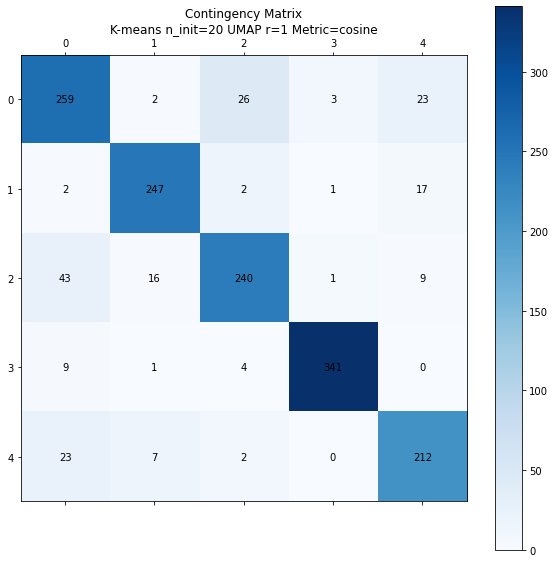

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=2 Metric=cosine,0.770678,0.77075,0.770714,0.802239,0.769939


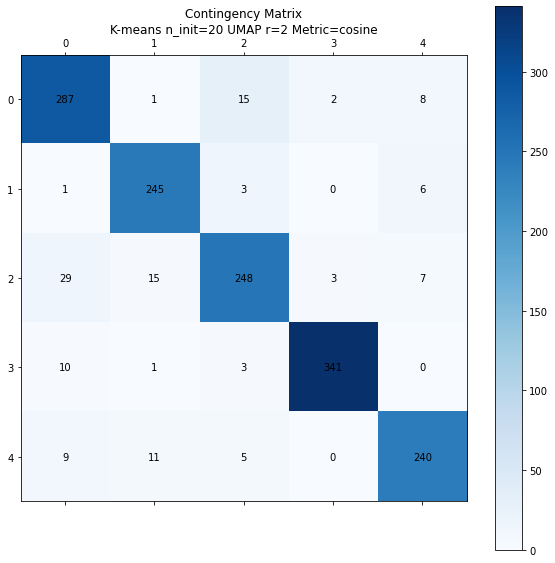

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=3 Metric=cosine,0.778441,0.778545,0.778493,0.811124,0.777745


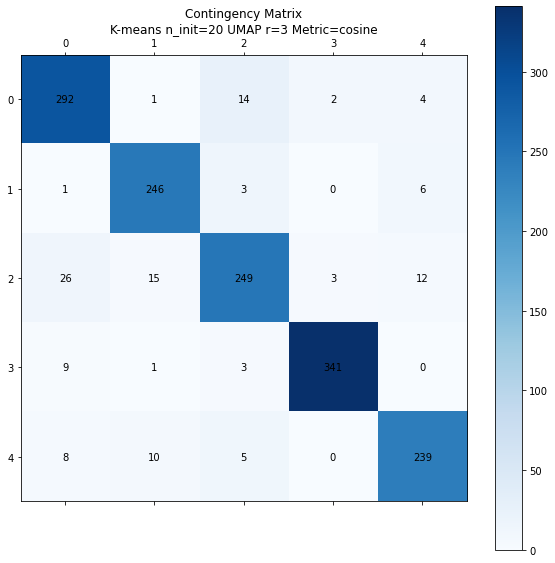

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=5 Metric=cosine,0.777439,0.777725,0.777582,0.811292,0.776831


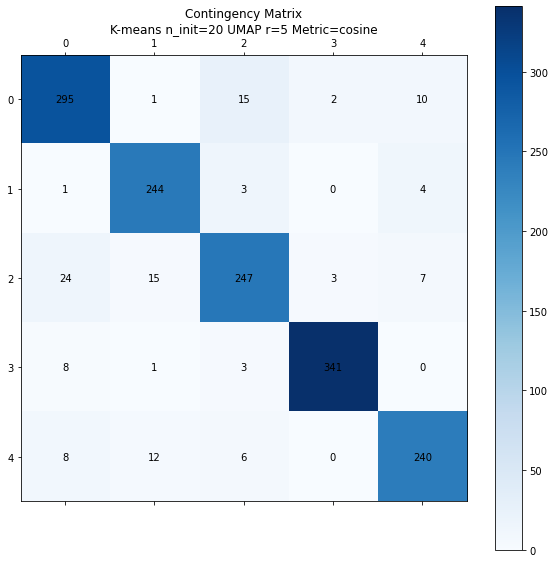

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=10 Metric=cosine,0.780806,0.781209,0.781007,0.814712,0.780267


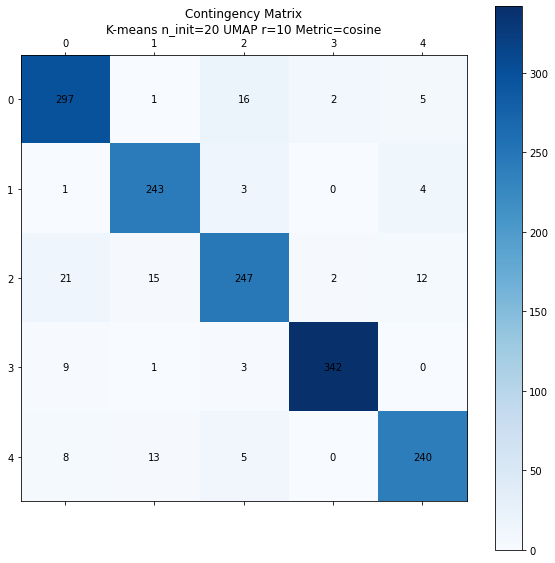

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=20 Metric=cosine,0.772816,0.77312,0.772968,0.806123,0.772201


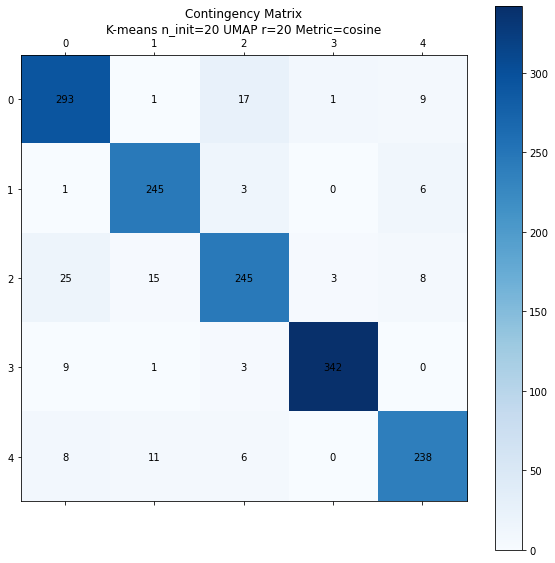

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=50 Metric=cosine,0.776489,0.776733,0.776611,0.811569,0.775857


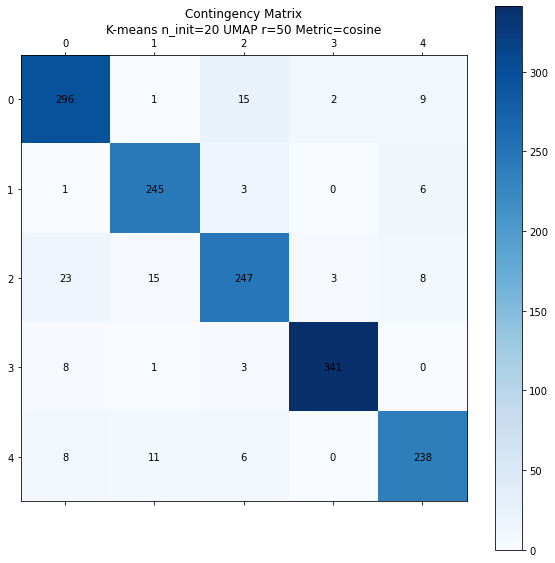

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=100 Metric=cosine,0.782231,0.782405,0.782318,0.814389,0.781583


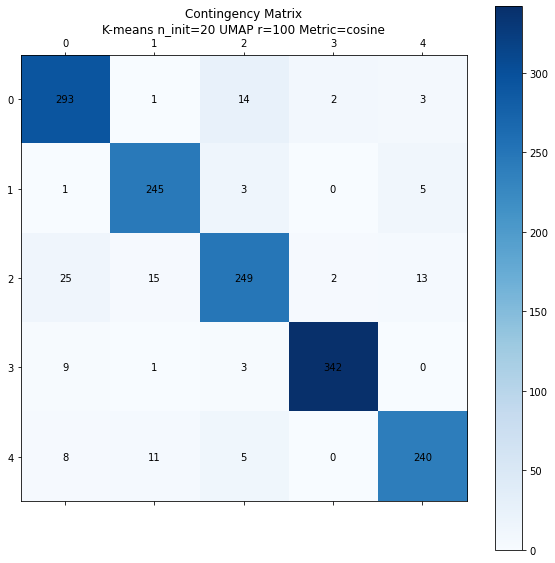

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
K-means n_init=20 UMAP r=1 Metric=cosine,0.702363,0.702926,0.702645,0.722179,0.701640
K-means n_init=20 UMAP r=2 Metric=cosine,0.770678,0.770750,0.770714,0.802239,0.769939
K-means n_init=20 UMAP r=3 Metric=cosine,0.778441,0.778545,0.778493,0.811124,0.777745
K-means n_init=20 UMAP r=5 Metric=cosine,0.777439,0.777725,0.777582,0.811292,0.776831
K-means n_init=20 UMAP r=10 Metric=cosine,0.780806,0.781209,0.781007,0.814712,0.780267
K-means n_init=20 UMAP r=20 Metric=cosine,0.772816,0.773120,0.772968,0.806123,0.772201
K-means n_init=20 UMAP r=50 Metric=cosine,0.776489,0.776733,0.776611,0.811569,0.775857
K-means n_init=20 UMAP r=100 Metric=cosine,0.782231,0.782405,0.782318,0.814389,0.781583


In [32]:
#test experiment #1
def umap_kmeans_plot_Q16(total_k,class_names,tfidf_train,true_labels,r,metric_type):
        umap_model = umap.UMAP(n_components=r,metric=metric_type)
        reduced_tfidf = umap_model.fit_transform(tfidf_train)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)
#         print(np.unique(reduced_tfidf))
        
#         printDashes(1)
#         print(reduced_tfidf_train.shape)
#         top_r_variance = 100*(TruncSVD_model.explained_variance_ratio_.sum())
#         print("i=",str(r_array[i]),TruncSVD_model.explained_variance_ratio_.sum())
        
        km = KMeans(n_clusters=total_k, init='k-means++', max_iter=1000, n_init=20)
        km_predicted_labels = km.fit_predict(reduced_tfidf) #train using the tf-idf matrix
        
        table_name = "K-means n_init=20 UMAP r=" + str(r) + " Metric=" + metric_type
#         print(km_predicted_labels.shape)
#         print(true_labels.shape)
        currDf = report_scores_kmeans(true_labels, km_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
#         #plot the cluster
#         plotTitle = "UMAP r = " + str(r) +", K-Means k = 20 Metric Type " + metric_type
# #         plot_cluster(km,reduced_tfidf,true_labels,"True Labels: UMAP, K-Means k = 20") 
# #         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)
# #         plot_cluster_nicely(km,class_names,reduced_tfidf,true_labels,"True Labels: UMAP, K-Means k = 20") 
#         plot_cluster_map(km,class_names,reduced_tfidf,km_predicted_labels,plotTitle)
# #         plot_cluster(km,reduced_tfidf,km_predicted_labels,plotTitle)
        
        #plot the contingency matrix
        plot_contingency_Q16(class_names,true_labels,km_predicted_labels,table_name)
        
        return currDf, km

r_array_UMAP = [1,2,3,5,10,20,50,100]
umap_metrics = ['cosine']
top_var_UMAP =[]
df_UMAP = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_UMAP)):
    for j in range(len(umap_metrics)):
        #NO FE
#         UMAP_df, top_var_UMAP, kmObj = umap_kmeans_plot_Q16(total_k_Q16,class_names_Q16,tfidf_bbcnews,targets_list_bbc,r_array_UMAP[i], umap_metrics[j])
        
        #with FE
        UMAP_df, kmObj = umap_kmeans_plot_Q16(total_k_Q16,class_names_Q16,tfidf_bbcnews_FE,targets_list_bbc,r_array_UMAP[i], umap_metrics[j])
#     display(SVD_df)
    
        df_UMAP = df_UMAP.append(UMAP_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_UMAP)


# Test Experiment 2

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=1 Metric=cosine LinkageCriteria=ward,0.640937,0.646571,0.643742,0.630985,0.642534


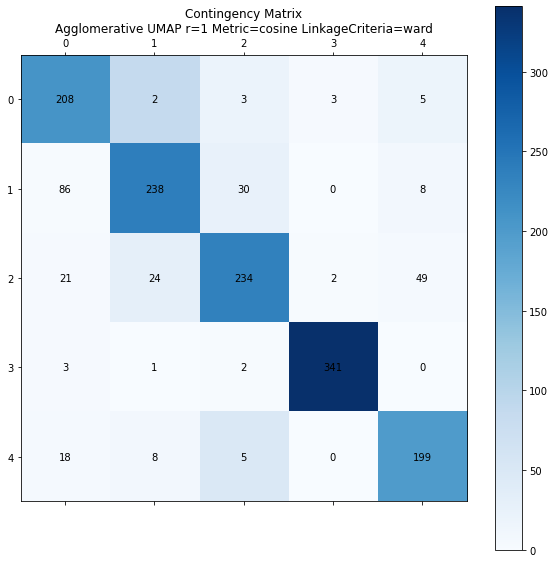

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=2 Metric=cosine LinkageCriteria=ward,0.756858,0.758036,0.757447,0.782758,0.756627


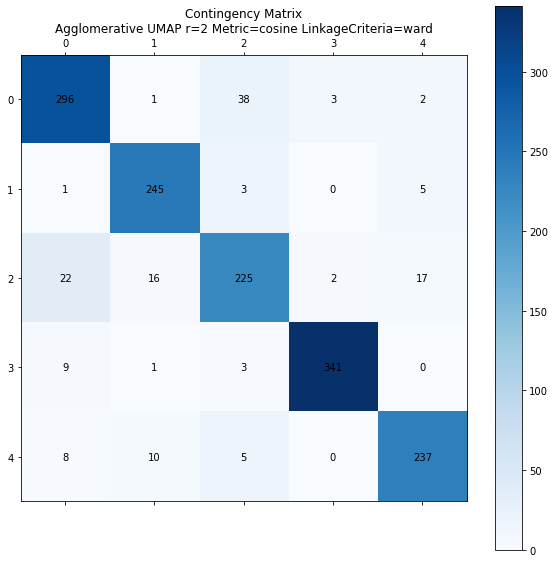

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=3 Metric=cosine LinkageCriteria=ward,0.76488,0.764913,0.764896,0.792028,0.764102


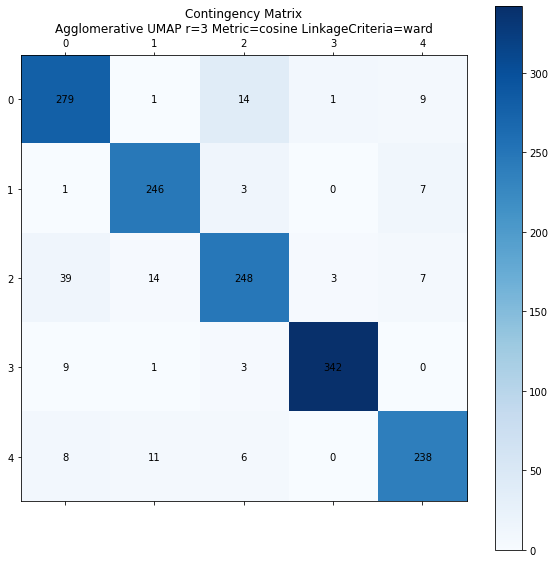

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=5 Metric=cosine LinkageCriteria=ward,0.763044,0.764716,0.763879,0.777473,0.763081


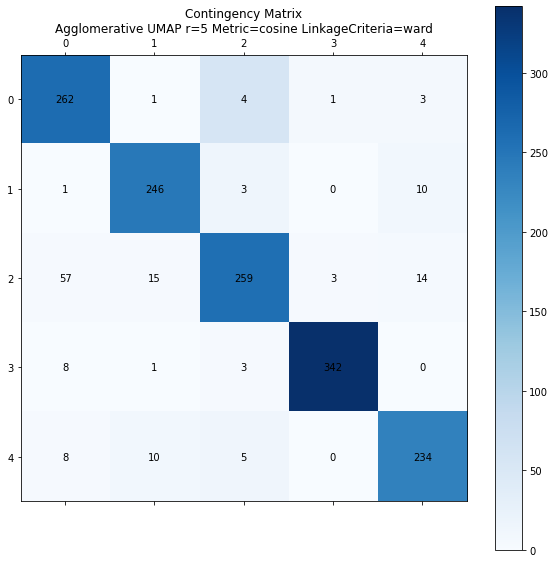

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=10 Metric=cosine LinkageCriteria=ward,0.767345,0.767531,0.767438,0.795562,0.766653


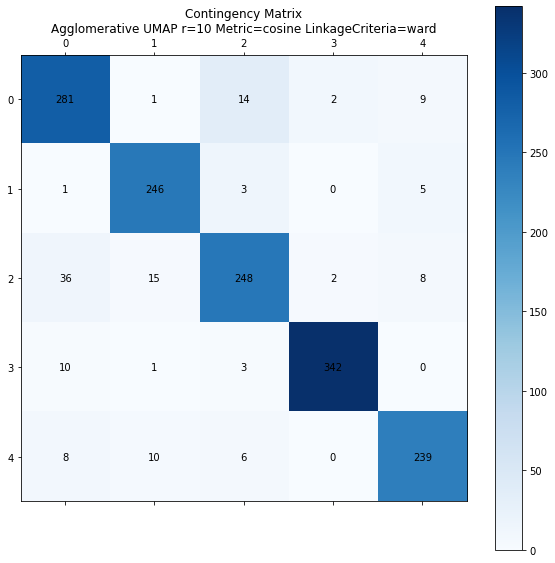

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=20 Metric=cosine LinkageCriteria=ward,0.76076,0.760963,0.760862,0.787946,0.760054


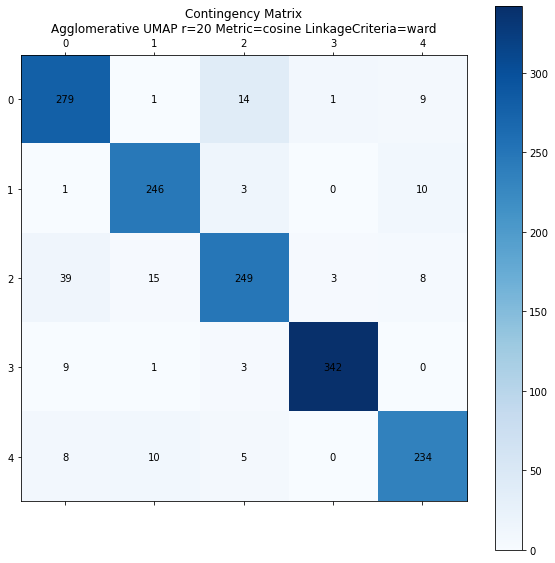

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=50 Metric=cosine LinkageCriteria=ward,0.772132,0.77281,0.772471,0.802137,0.771702


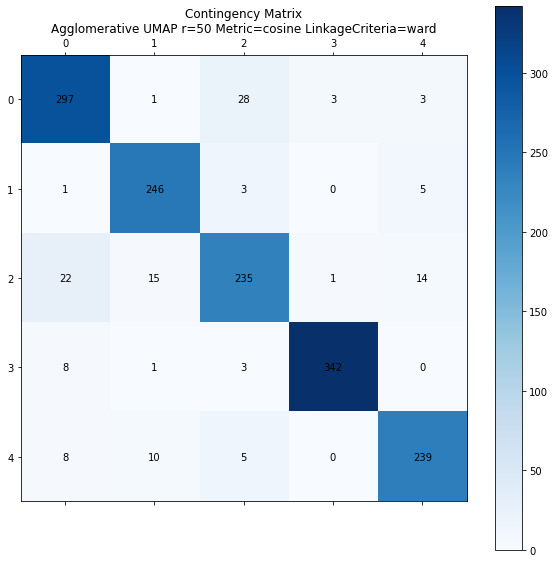

[0 1 2 3 4]


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=100 Metric=cosine LinkageCriteria=ward,0.77426,0.774785,0.774522,0.799679,0.773761


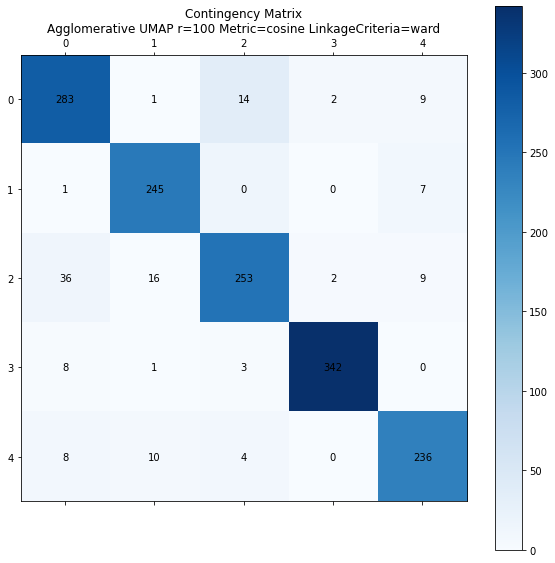

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
Agglomerative UMAP r=1 Metric=cosine LinkageCriteria=ward,0.640937,0.646571,0.643742,0.630985,0.642534
Agglomerative UMAP r=2 Metric=cosine LinkageCriteria=ward,0.756858,0.758036,0.757447,0.782758,0.756627
Agglomerative UMAP r=3 Metric=cosine LinkageCriteria=ward,0.764880,0.764913,0.764896,0.792028,0.764102
Agglomerative UMAP r=5 Metric=cosine LinkageCriteria=ward,0.763044,0.764716,0.763879,0.777473,0.763081
Agglomerative UMAP r=10 Metric=cosine LinkageCriteria=ward,0.767345,0.767531,0.767438,0.795562,0.766653
Agglomerative UMAP r=20 Metric=cosine LinkageCriteria=ward,0.760760,0.760963,0.760862,0.787946,0.760054
Agglomerative UMAP r=50 Metric=cosine LinkageCriteria=ward,0.772132,0.772810,0.772471,0.802137,0.771702
Agglomerative UMAP r=100 Metric=cosine LinkageCriteria=ward,0.774260,0.774785,0.774522,0.799679,0.773761


In [33]:
#test experiment 2
def umap_agglo_plot_Q16(total_k,class_names,tfidf_train,true_labels,r,metric_type):
        umap_model = umap.UMAP(n_components=r,metric=metric_type)
        reduced_tfidf = umap_model.fit_transform(tfidf_train)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)

        agglo = AgglomerativeClustering(n_clusters=total_k,linkage='ward')
        agglo_predicted_labels = agglo.fit_predict(reduced_tfidf)
        print(np.unique(agglo_predicted_labels))
        
        table_name = "Agglomerative UMAP r=" + str(r) + " Metric=" + metric_type + " LinkageCriteria=ward"
        currDf = report_scores_kmeans(true_labels, agglo_predicted_labels,classifier_name=table_name)
        
        display(currDf)
    
#         #plot the cluster
#         plotTitle = "Agglomerative UMAP r = " + str(r) +", Metric Type " + metric_type + " Linkage Criteria " + linkcrit
#         plot_cluster_Agglomerative(agglo,reduced_tfidf,true_labels,"True Labels: Agglomerative UMAP") 
#         plot_cluster_Agglomerative(agglo,reduced_tfidf,agglo_predicted_labels,plotTitle)
        
        #plot the contingency matrix
        plot_contingency_Q16(class_names,true_labels,agglo_predicted_labels,table_name)
        
        return currDf, agglo

from sklearn.decomposition import TruncatedSVD

r_array_UMAP = [1,2,3,5,10,20,50,100]
umap_metrics = ['cosine']
linkage_criteria = ['ward']
top_var_UMAP =[]
df_agglo_Q16 = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array_UMAP)):
    for j in range(len(umap_metrics)):
#         agglo_df_Q16, kmObj = umap_agglo_plot_Q16(total_k_Q16,class_names_Q16,tfidf_bbcnews,targets_list_bbc,r_array_UMAP[i], umap_metrics[j])

        agglo_df_Q16, kmObj = umap_agglo_plot_Q16(total_k_Q16,class_names_Q16,tfidf_bbcnews_FE,targets_list_bbc,r_array_UMAP[i], umap_metrics[j])
    
        df_agglo_Q16 = df_agglo_Q16.append(agglo_df_Q16)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_agglo_Q16)


# Test Experiment 3

In [50]:
#test experiment 3
#3) DBSCAN UMAP eps=1 min_sample=100 metric=cityblock

from sklearn.cluster import DBSCAN

def umap_dbscan_plot(red_tfidf,total_k,class_names,true_labels,r,eps_array,min_samps):
        umap_model = umap.UMAP(n_components=r,metric='cosine')
        reduced_tfidf = umap_model.fit_transform(tfidf_bbcnews_FE)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)
        
        dbscan_model = DBSCAN(eps=eps_array,min_samples=min_samps,metric='cityblock',n_jobs=-1)
        dbscan_predicted_labels = dbscan_model.fit_predict(reduced_tfidf)
#         print(np.unique(dbscan_predicted_labels))
        
        table_name = "DBSCAN UMAP r=" + str(r) + " Metric=cityblock" + " eps=" + str(eps_array) + " min_samp=" + str(min_samps)
        currDf = report_scores_kmeans(true_labels, dbscan_predicted_labels,classifier_name=table_name)
        
        display(currDf)
        
        #plot the contingency matrix
#         plot_contingency_Q16(class_names,true_labels,dbscan_predicted_labels,table_name)
        
        return currDf, dbscan_model

from sklearn.decomposition import TruncatedSVD

r_array = [1,2,3,5]
eps_list = [1]
min_sample = [1,10,100]
# umap_metrics_dbscan = ['cityblock']
df_dbscan = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array)):
    for j in range(len(eps_list)):
        for k in range(len(min_sample)):
            dbscan_df, kmObj = umap_dbscan_plot(reduced_tfidf,total_k_Q16,class_names_Q16,targets_list_bbc,r_array[i],eps_list[j],min_sample[k])
            
#             dbscan_df, top_var_dbscan, kmObj = umap_dbscan_plot(total_k,true_label_names,tfidf_dataset_Q9,dataset_Q9.target,r_array_dbscan[i],eps_list[j],min_sample[k])
    
            df_dbscan = df_dbscan.append(dbscan_df)
    
#     top_var_SVD_Q9.append(top_var_SVD_Q9)
    
display(df_dbscan)

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=1 Metric=cityblock eps=1 min_samp=1,0.296711,0.869663,0.442462,0.22894,0.441763


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=1 Metric=cityblock eps=1 min_samp=10,0.313932,0.653443,0.42411,0.168965,0.422123


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=1 Metric=cityblock eps=1 min_samp=100,0.580571,0.60767,0.593811,0.522089,0.592408


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=2 Metric=cityblock eps=1 min_samp=1,0.315754,0.715781,0.438202,0.197343,0.43612


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=2 Metric=cityblock eps=1 min_samp=10,0.314491,0.625173,0.418472,0.166068,0.41574


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=2 Metric=cityblock eps=1 min_samp=100,0.372179,0.488669,0.422543,0.156118,0.420321


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=3 Metric=cityblock eps=1 min_samp=1,0.570487,0.67026,0.616362,0.477804,0.613429


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=3 Metric=cityblock eps=1 min_samp=10,0.562222,0.646102,0.60125,0.471327,0.598585


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=3 Metric=cityblock eps=1 min_samp=100,0.067907,0.435907,0.117508,0.009379,0.116213


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=5 Metric=cityblock eps=1 min_samp=1,0.580199,0.647903,0.612185,0.481347,0.60808


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=5 Metric=cityblock eps=1 min_samp=10,0.794003,0.566571,0.661278,0.61593,0.657479


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=5 Metric=cityblock eps=1 min_samp=100,4.157073e-16,1.0,8.314146e-16,0.0,1.239124e-15


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
DBSCAN UMAP r=1 Metric=cityblock eps=1 min_samp=1,2.967106e-01,0.869663,4.424623e-01,0.228940,4.417628e-01
DBSCAN UMAP r=1 Metric=cityblock eps=1 min_samp=10,3.139323e-01,0.653443,4.241101e-01,0.168965,4.221227e-01
DBSCAN UMAP r=1 Metric=cityblock eps=1 min_samp=100,5.805707e-01,0.607670,5.938114e-01,0.522089,5.924075e-01
DBSCAN UMAP r=2 Metric=cityblock eps=1 min_samp=1,3.157537e-01,0.715781,4.382024e-01,0.197343,4.361202e-01
DBSCAN UMAP r=2 Metric=cityblock eps=1 min_samp=10,3.144914e-01,0.625173,4.184719e-01,0.166068,4.157398e-01
DBSCAN UMAP r=2 Metric=cityblock eps=1 min_samp=100,3.721793e-01,0.488669,4.225426e-01,0.156118,4.203214e-01
DBSCAN UMAP r=3 Metric=cityblock eps=1 min_samp=1,5.704871e-01,0.670260,6.163621e-01,0.477804,6.134291e-01
DBSCAN UMAP r=3 Metric=cityblock eps=1 min_samp=10,5.622219e-01,0.646102,6.012504e-01,0.471327,5.985852e-01
DBSCAN UMAP r=3 Metric=cityblock eps=1 min_samp=100,6.790677e-02,0.435907,1.175079e-01,0.009379,1.162134e-01
DBSCAN UMAP r=5 Metric=cityblock eps=1 min_samp=1,5.801988e-01,0.647903,6.121849e-01,0.481347,6.080805e-01


# Test Experiment 4

In [53]:
#test experiment 4

from hdbscan import HDBSCAN

def umap_hdbscan_plot(red_tfidf,total_k,class_names,true_labels,r,eps,min_samps):
        umap_model = umap.UMAP(n_components=r,metric='cosine')
        reduced_tfidf = umap_model.fit_transform(tfidf_bbcnews_FE)
        from sklearn.impute import SimpleImputer
        imp = SimpleImputer(missing_values=np.nan, strategy='mean')
        reduced_tfidf = imp.fit_transform(reduced_tfidf)
        
        hdbscan_model = HDBSCAN(min_cluster_size=100,min_samples=min_samps,cluster_selection_epsilon=eps,metric='cityblock')
        hdbscan_predicted_labels = hdbscan_model.fit_predict(reduced_tfidf)
#         print(np.unique(dbscan_predicted_labels))
        
        table_name = "HDBSCAN UMAP r=" + str(r) + " Metric=cityblock" + " eps=" + str(eps) + " min_samp=" + str(min_samps)
        currDf = report_scores_kmeans(true_labels, hdbscan_predicted_labels,classifier_name=table_name)
        
        display(currDf)
        
        #plot the contingency matrix
#         plot_contingency_Q16(class_names,true_labels,hdbscan_predicted_labels,table_name)
        
        return currDf, hdbscan_model

from sklearn.decomposition import TruncatedSVD

r_array = [1,2,3,5]
eps_list = [0.5]
min_sample = [5, 10, 50]
# umap_metrics_hdbscan = ['cityblock']
df_hdbscan = pd.DataFrame(index=[],columns = ['Homogeneity', 'Completeness', 'V_measure', 'Adjusted_Rand_Index', 'Adjusted_Mutual_Info_Score'])
for i in range(len(r_array)):
    for j in range(len(eps_list)):
        for k in range(len(min_sample)):
            hdbscan_df, kmObj = umap_hdbscan_plot(reduced_tfidf,total_k_Q16,class_names_Q16,targets_list_bbc,r_array[i],eps_list[j],min_sample[k])
                
            df_hdbscan = df_hdbscan.append(hdbscan_df)
        
display(df_hdbscan)

,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=1 Metric=cityblock eps=0.5 min_samp=5,0.304654,0.842326,0.447467,0.237515,0.44595


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=1 Metric=cityblock eps=0.5 min_samp=10,0.291691,0.649542,0.40259,0.175363,0.401197


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=1 Metric=cityblock eps=0.5 min_samp=50,0.658587,0.703134,0.680132,0.628753,0.679015


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=2 Metric=cityblock eps=0.5 min_samp=5,0.311332,0.70561,0.432038,0.177384,0.430706


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=2 Metric=cityblock eps=0.5 min_samp=10,0.311412,0.906276,0.463542,0.239464,0.462871


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=2 Metric=cityblock eps=0.5 min_samp=50,0.310448,0.70552,0.43117,0.176369,0.429835


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=3 Metric=cityblock eps=0.5 min_samp=5,0.661426,0.71629,0.687766,0.65689,0.686667


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=3 Metric=cityblock eps=0.5 min_samp=10,0.557273,0.812059,0.660963,0.565031,0.659875


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=3 Metric=cityblock eps=0.5 min_samp=50,0.307497,0.898698,0.458213,0.236364,0.457534


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=5 Metric=cityblock eps=0.5 min_samp=5,0.662738,0.657905,0.660312,0.581938,0.658877


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=5 Metric=cityblock eps=0.5 min_samp=10,0.306455,0.894378,0.456494,0.236035,0.455813


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=5 Metric=cityblock eps=0.5 min_samp=50,0.547847,0.817642,0.656091,0.559041,0.655398


,Homogeneity,Completeness,V_measure,Adjusted_Rand_Index,Adjusted_Mutual_Info_Score
HDBSCAN UMAP r=1 Metric=cityblock eps=0.5 min_samp=5,0.304654,0.842326,0.447467,0.237515,0.445950
HDBSCAN UMAP r=1 Metric=cityblock eps=0.5 min_samp=10,0.291691,0.649542,0.402590,0.175363,0.401197
HDBSCAN UMAP r=1 Metric=cityblock eps=0.5 min_samp=50,0.658587,0.703134,0.680132,0.628753,0.679015
HDBSCAN UMAP r=2 Metric=cityblock eps=0.5 min_samp=5,0.311332,0.705610,0.432038,0.177384,0.430706
HDBSCAN UMAP r=2 Metric=cityblock eps=0.5 min_samp=10,0.311412,0.906276,0.463542,0.239464,0.462871
HDBSCAN UMAP r=2 Metric=cityblock eps=0.5 min_samp=50,0.310448,0.705520,0.431170,0.176369,0.429835
HDBSCAN UMAP r=3 Metric=cityblock eps=0.5 min_samp=5,0.661426,0.716290,0.687766,0.656890,0.686667
HDBSCAN UMAP r=3 Metric=cityblock eps=0.5 min_samp=10,0.557273,0.812059,0.660963,0.565031,0.659875
HDBSCAN UMAP r=3 Metric=cityblock eps=0.5 min_samp=50,0.307497,0.898698,0.458213,0.236364,0.457534
HDBSCAN UMAP r=5 Metric=cityblock eps=0.5 min_samp=5,0.662738,0.657905,0.660312,0.581938,0.658877
